# Financial Portfolios, Modern Portfolio Theory & Asset Pricing

## Getting the Data

In [2]:
import pandas as pd
import yfinance as yf

In [3]:
#stocks = yf.download(["AMZN", "BA", "DIS", "IBM", "KO", "MSFT"], 
                     #start = "2014-01-01", end = "2018-12-31")

In [4]:
stocks = pd.read_csv("data/index_stocks.csv", header = [0,1], index_col = [0], parse_dates = [0])

In [5]:
stocks.head()

Price       Adj Close                                                \
Ticker           AMZN          BA        DIS         IBM         KO   
Date                                                                  
2014-01-02  19.898500  116.807938  69.643188  114.382736  29.140572   
2014-01-03  19.822001  117.619896  69.497108  115.067047  28.997252   
2014-01-06  19.681499  118.295067  69.232307  114.672470  28.861074   
2014-01-07  19.901501  120.089859  69.707115  116.959778  28.947079   
2014-01-08  20.096001  120.354813  68.684425  115.887039  28.624565   

Price                      Close                                     ...  \
Ticker           MSFT       AMZN          BA        DIS         IBM  ...   
Date                                                                 ...   
2014-01-02  31.176825  19.898500  136.669998  76.269997  177.370941  ...   
2014-01-03  30.967075  19.822001  137.619995  76.110001  178.432129  ...   
2014-01-06  30.312679  19.681499  138.410004  75.820000  177.820267  ...   
2014-01-07  30.547596  19.901501  140.509995  76.339996  181.367111  ...   
2014-01-08  30.002243  20.096001  140.820007  75.220001  179.703629  ...   

Price            Open                                      Volume           \
Ticker            DIS         IBM         KO       MSFT      AMZN       BA   
Date                                                                         
2014-01-02  76.040001  178.977051  41.119999  37.349998  42756000  3366700   
2014-01-03  76.300003  177.657745  40.680000  37.200001  44204000  3177400   
2014-01-06  76.529999  178.919693  40.480000  36.849998  63412000  4196500   
2014-01-07  76.120003  178.193115  40.480000  36.330002  38320000  4238500   
2014-01-08  76.129997  181.003830  40.439999  36.000000  46330000  4236100   

Price                                              
Ticker           DIS      IBM        KO      MSFT  
Date                                               
2014-01-02   5200900  4755639  12698600  30632200  
2014-01-03   4060700  4250107  10403400  31134800  
2014-01-06   6816200  4254919  11036300  43603700  
2014-01-07   4494900  6205186  11872300  35802800  
2014-01-08  10900300  4815470  15339600  59971700  

[5 rows x 36 columns]

In [6]:
stocks.tail()

Price       Adj Close                                                \
Ticker           AMZN          BA         DIS        IBM         KO   
Date                                                                  
2018-12-21  68.872498  295.930267  102.155922  81.543442  40.061104   
2018-12-24  67.197998  285.834351   98.362564  79.066422  38.705235   
2018-12-26  73.544998  305.044739  103.734032  81.874207  39.530552   
2018-12-27  73.082001  308.163971  104.410355  83.630913  40.027409   
2018-12-28  73.901001  307.425446  105.174927  83.079651  39.749504   

Price                      Close                                      ...  \
Ticker           MSFT       AMZN          BA         DIS         IBM  ...   
Date                                                                  ...   
2018-12-21  92.939133  68.872498  304.549988  104.220001  106.061188  ...   
2018-12-24  89.059952  67.197998  294.160004  100.349998  102.839386  ...   
2018-12-26  95.143600  73.544998  313.929993  105.830002  106.491394  ...   
2018-12-27  95.730209  73.082001  317.140015  106.519997  108.776291  ...   
2018-12-28  94.982765  73.901001  316.380005  107.300003  108.059273  ...   

Price             Open                                        Volume           \
Ticker             DIS         IBM         KO        MSFT       AMZN       BA   
Date                                                                            
2018-12-21  106.470001  107.552582  47.259998  101.629997  272806000  7641700   
2018-12-24  103.230003  105.066925  47.619999   97.680000  144400000  3435300   
2018-12-26  100.489998  103.250481  45.880001   95.139999  208236000  4843400   
2018-12-27  104.410004  105.152962  46.740002   99.300003  194440000  4341100   
2018-12-28  107.279999  109.196938  47.889999  102.089996  176580000  3725200   

Price                                                
Ticker           DIS       IBM        KO       MSFT  
Date                                                 
2018-12-21  15530600  10864279  32477700  111242100  
2018-12-24   7133000   3997184  10733700   43935200  
2018-12-26   9422800   6951507  14342600   51634800  
2018-12-27   8201400   6323698  16966500   49498500  
2018-12-28   7620500   5352905  13218200   38196300  

[5 rows x 36 columns]

In [7]:
stocks = stocks["Adj Close"].copy()

In [8]:
stocks.head()

Ticker,AMZN,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2014-01-02,19.898500,116.807938,69.643188,114.382736,29.140572,31.176825
2014-01-03,19.822001,117.619896,69.497108,115.067047,28.997252,30.967075
2014-01-06,19.681499,118.295067,69.232307,114.672470,28.861074,30.312679
2014-01-07,19.901501,120.089859,69.707115,116.959778,28.947079,30.547596
2014-01-08,20.096001,120.354813,68.684425,115.887039,28.624565,30.002243


In [9]:
stocks.to_csv("data/port_stocks.csv")

## Creating the equal-weighted Portfolio

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-v0_8")
pd.options.display.float_format = '{:.4f}'.format

In [11]:
stocks = pd.read_csv("data/port_stocks.csv", parse_dates= ["Date"], index_col= "Date")

In [12]:
stocks.head()

,AMZN,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2014-01-02,19.8985,116.8079,69.6432,114.3827,29.1406,31.1768
2014-01-03,19.8220,117.6199,69.4971,115.0670,28.9973,30.9671
2014-01-06,19.6815,118.2951,69.2323,114.6725,28.8611,30.3127
2014-01-07,19.9015,120.0899,69.7071,116.9598,28.9471,30.5476
2014-01-08,20.0960,120.3548,68.6844,115.8870,28.6246,30.0022


In [13]:
ret = stocks.pct_change().dropna()

In [14]:
ret.head()

,AMZN,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2014-01-03,-0.0038,0.0070,-0.0021,0.0060,-0.0049,-0.0067
2014-01-06,-0.0071,0.0057,-0.0038,-0.0034,-0.0047,-0.0211
2014-01-07,0.0112,0.0152,0.0069,0.0199,0.0030,0.0077
2014-01-08,0.0098,0.0022,-0.0147,-0.0092,-0.0111,-0.0179
2014-01-09,-0.0023,0.0093,-0.0043,-0.0031,-0.0053,-0.0064


In [15]:
ret.mean(axis = 1)

Date
2014-01-03   -0.0008
2014-01-06   -0.0057
2014-01-07    0.0106
2014-01-08   -0.0068
2014-01-09   -0.0020
               ...  
2018-12-21   -0.0267
2018-12-24   -0.0336
2018-12-26    0.0569
2018-12-27    0.0084
2018-12-28   -0.0009
Length: 1256, dtype: float64

In [16]:
no_assets = len(stocks.columns)
no_assets

6

In [17]:
weights = [1/no_assets for i in range(no_assets)]
weights

[0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666]

In [18]:
ret.mul(weights, axis = "columns").sum(axis = 1)

Date
2014-01-03   -0.0008
2014-01-06   -0.0057
2014-01-07    0.0106
2014-01-08   -0.0068
2014-01-09   -0.0020
               ...  
2018-12-21   -0.0267
2018-12-24   -0.0336
2018-12-26    0.0569
2018-12-27    0.0084
2018-12-28   -0.0009
Length: 1256, dtype: float64

In [19]:
ret.dot(weights)

Date
2014-01-03   -0.0008
2014-01-06   -0.0057
2014-01-07    0.0106
2014-01-08   -0.0068
2014-01-09   -0.0020
               ...  
2018-12-21   -0.0267
2018-12-24   -0.0336
2018-12-26    0.0569
2018-12-27    0.0084
2018-12-28   -0.0009
Length: 1256, dtype: float64

In [20]:
ret["EWP"] = ret.dot(weights)

In [21]:
ret.head()

,AMZN,BA,DIS,IBM,KO,MSFT,EWP
Date,,,,,,,
2014-01-03,-0.0038,0.0070,-0.0021,0.0060,-0.0049,-0.0067,-0.0008
2014-01-06,-0.0071,0.0057,-0.0038,-0.0034,-0.0047,-0.0211,-0.0057
2014-01-07,0.0112,0.0152,0.0069,0.0199,0.0030,0.0077,0.0106
2014-01-08,0.0098,0.0022,-0.0147,-0.0092,-0.0111,-0.0179,-0.0068
2014-01-09,-0.0023,0.0093,-0.0043,-0.0031,-0.0053,-0.0064,-0.0020


In [22]:
summary = ret.agg(["mean", "std"]).T

In [23]:
summary

,mean,std
AMZN,0.0012,0.0195
BA,0.0009,0.0147
DIS,0.0004,0.0119
IBM,-0.0002,0.0126
KO,0.0003,0.0086
MSFT,0.0010,0.0146
EWP,0.0006,0.0095


In [24]:
summary.columns = ["Return", "Risk"]

In [25]:
summary.Return = summary.Return*252
summary.Risk = summary.Risk * np.sqrt(252)

In [26]:
summary

,Return,Risk
AMZN,0.3111,0.3100
BA,0.2214,0.2330
DIS,0.1006,0.1888
IBM,-0.0442,0.1993
KO,0.0717,0.1368
MSFT,0.2504,0.2317
EWP,0.1518,0.1514


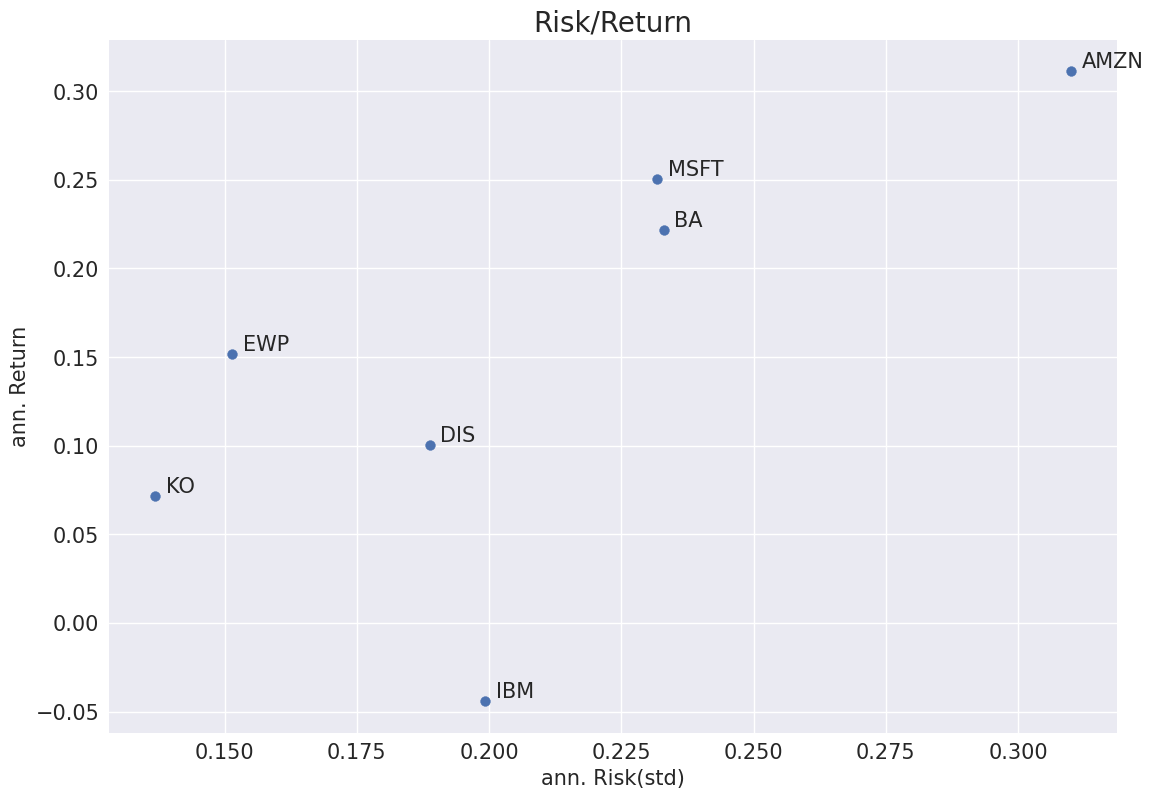

In [27]:
summary.plot(kind = "scatter", x = "Risk", y = "Return", figsize = (13,9), s = 50, fontsize = 15)
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "Risk"]+0.002, summary.loc[i, "Return"]+0.002), size = 15)
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Risk/Return", fontsize = 20)
plt.show()

In [28]:
def ann_risk_return(returns_df):
    summary = returns_df.agg(["mean", "std"]).T
    summary.columns = ["Return", "Risk"]
    summary.Return = summary.Return*252
    summary.Risk = summary.Risk * np.sqrt(252)
    return summary

## Creating many Random Portfolios

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-v0_8")
pd.options.display.float_format = '{:.4f}'.format

In [30]:
stocks = pd.read_csv("data/port_stocks.csv", parse_dates= ["Date"], index_col= "Date")

In [31]:
stocks.head()

,AMZN,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2014-01-02,19.8985,116.8079,69.6432,114.3827,29.1406,31.1768
2014-01-03,19.8220,117.6199,69.4971,115.0670,28.9973,30.9671
2014-01-06,19.6815,118.2951,69.2323,114.6725,28.8611,30.3127
2014-01-07,19.9015,120.0899,69.7071,116.9598,28.9471,30.5476
2014-01-08,20.0960,120.3548,68.6844,115.8870,28.6246,30.0022


In [32]:
ret = stocks.pct_change().dropna()
ret.head()

,AMZN,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2014-01-03,-0.0038,0.0070,-0.0021,0.0060,-0.0049,-0.0067
2014-01-06,-0.0071,0.0057,-0.0038,-0.0034,-0.0047,-0.0211
2014-01-07,0.0112,0.0152,0.0069,0.0199,0.0030,0.0077
2014-01-08,0.0098,0.0022,-0.0147,-0.0092,-0.0111,-0.0179
2014-01-09,-0.0023,0.0093,-0.0043,-0.0031,-0.0053,-0.0064


In [33]:
summary = ann_risk_return(ret)

In [34]:
summary

,Return,Risk
AMZN,0.3111,0.3100
BA,0.2214,0.2330
DIS,0.1006,0.1888
IBM,-0.0442,0.1993
KO,0.0717,0.1368
MSFT,0.2504,0.2317


In [35]:
noa = len(stocks.columns)
noa

6

In [36]:
nop = 10000
nop

10000

In [37]:
np.random.random(noa * nop).reshape(noa, nop)

array([[0.03260583, 0.78856824, 0.39862228, ..., 0.45626067, 0.30066374,
        0.28430951],
       [0.32578177, 0.71544402, 0.23187531, ..., 0.7606937 , 0.28233933,
        0.56186302],
       [0.69891483, 0.18089168, 0.84617155, ..., 0.98555661, 0.75677763,
        0.62004682],
       [0.83968722, 0.31793534, 0.59625094, ..., 0.4718015 , 0.45188135,
        0.3218559 ],
       [0.58665509, 0.43363031, 0.6809464 , ..., 0.90237151, 0.46654285,
        0.58172829],
       [0.37961942, 0.25514276, 0.27310716, ..., 0.40132436, 0.71587018,
        0.6324651 ]])

In [38]:
np.random.seed(123)
matrix = np.random.random(noa * nop).reshape(nop, noa)

In [39]:
matrix

array([[6.96469186e-01, 2.86139335e-01, 2.26851454e-01, 5.51314769e-01,
        7.19468970e-01, 4.23106460e-01],
       [9.80764198e-01, 6.84829739e-01, 4.80931901e-01, 3.92117518e-01,
        3.43178016e-01, 7.29049707e-01],
       [4.38572245e-01, 5.96778966e-02, 3.98044255e-01, 7.37995406e-01,
        1.82491730e-01, 1.75451756e-01],
       ...,
       [1.54233601e-01, 7.01517016e-01, 1.88272835e-04, 3.16434625e-03,
        1.48153795e-01, 2.36841411e-01],
       [9.81419821e-01, 1.77248729e-01, 5.26242589e-01, 2.01518574e-01,
        5.34389538e-01, 4.38449038e-01],
       [7.06401840e-01, 5.68738882e-01, 2.55139068e-01, 3.55529043e-02,
        3.93868332e-01, 1.32760524e-01]])

In [40]:
matrix.sum(axis = 1, keepdims= True)

array([[2.90335017],
       [3.61087108],
       [1.99223329],
       ...,
       [1.24409844],
       [2.85926829],
       [2.09246155]])

In [41]:
weights = matrix / matrix.sum(axis = 1, keepdims= True)

In [42]:
weights

array([[2.39884666e-01, 9.85548824e-02, 7.81343758e-02, 1.89889175e-01,
        2.47806474e-01, 1.45730427e-01],
       [2.71614294e-01, 1.89657765e-01, 1.33189995e-01, 1.08593608e-01,
        9.50402295e-02, 2.01904109e-01],
       [2.20141008e-01, 2.99552753e-02, 1.99798014e-01, 3.70436238e-01,
        9.16015868e-02, 8.80678770e-02],
       ...,
       [1.23972184e-01, 5.63875809e-01, 1.51332747e-04, 2.54348542e-03,
        1.19085267e-01, 1.90371922e-01],
       [3.43241600e-01, 6.19909399e-02, 1.84047993e-01, 7.04790714e-02,
        1.86897305e-01, 1.53343091e-01],
       [3.37593701e-01, 2.71803743e-01, 1.21932500e-01, 1.69909475e-02,
        1.88232052e-01, 6.34470553e-02]])

In [43]:
weights.sum(axis = 1, keepdims= True)

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [44]:
port_ret = ret.dot(weights.T)

In [45]:
port_ret

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-03,-0.0015,-0.0012,0.0001,-0.0006,-0.0022,0.0002,0.0005,-0.0023,0.0001,-0.0012,...,0.0010,-0.0029,0.0003,-0.0003,-0.0001,0.0002,-0.0005,0.0016,-0.0028,-0.0009
2014-01-06,-0.0063,-0.0064,-0.0057,-0.0058,-0.0079,-0.0046,-0.0024,-0.0082,-0.0055,-0.0062,...,-0.0029,-0.0055,-0.0040,-0.0043,-0.0052,-0.0064,-0.0065,-0.0022,-0.0071,-0.0036
2014-01-07,0.0104,0.0108,0.0126,0.0109,0.0101,0.0110,0.0107,0.0090,0.0119,0.0100,...,0.0118,0.0079,0.0119,0.0103,0.0117,0.0121,0.0122,0.0118,0.0092,0.0101
2014-01-08,-0.0057,-0.0045,-0.0067,-0.0077,-0.0055,-0.0088,-0.0061,-0.0102,-0.0060,-0.0087,...,-0.0060,-0.0057,-0.0045,-0.0062,-0.0034,-0.0088,-0.0045,-0.0023,-0.0047,-0.0013
2014-01-09,-0.0028,-0.0016,-0.0033,-0.0024,-0.0025,-0.0017,-0.0006,-0.0031,-0.0016,-0.0031,...,-0.0010,-0.0029,-0.0017,-0.0007,-0.0006,-0.0019,-0.0022,0.0031,-0.0032,-0.0002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-21,-0.0264,-0.0326,-0.0282,-0.0248,-0.0327,-0.0215,-0.0244,-0.0265,-0.0254,-0.0214,...,-0.0261,-0.0286,-0.0266,-0.0276,-0.0297,-0.0270,-0.0298,-0.0285,-0.0322,-0.0321
2018-12-24,-0.0323,-0.0330,-0.0318,-0.0336,-0.0333,-0.0345,-0.0334,-0.0359,-0.0329,-0.0338,...,-0.0329,-0.0329,-0.0316,-0.0342,-0.0324,-0.0347,-0.0318,-0.0343,-0.0322,-0.0315
2018-12-26,0.0555,0.0653,0.0548,0.0536,0.0653,0.0500,0.0545,0.0578,0.0546,0.0490,...,0.0553,0.0596,0.0551,0.0599,0.0618,0.0569,0.0595,0.0652,0.0636,0.0658


In [46]:
port_summary = ann_risk_return(port_ret)

In [47]:
port_summary

,Return,Risk
0,0.1502,0.1534
1,0.1925,0.1712
2,0.1075,0.1588
3,0.1325,0.1466
4,0.1959,0.1724
...,...,...
9995,0.1367,0.1571
9996,0.1562,0.1674
9997,0.2195,0.1827
9998,0.1877,0.1705


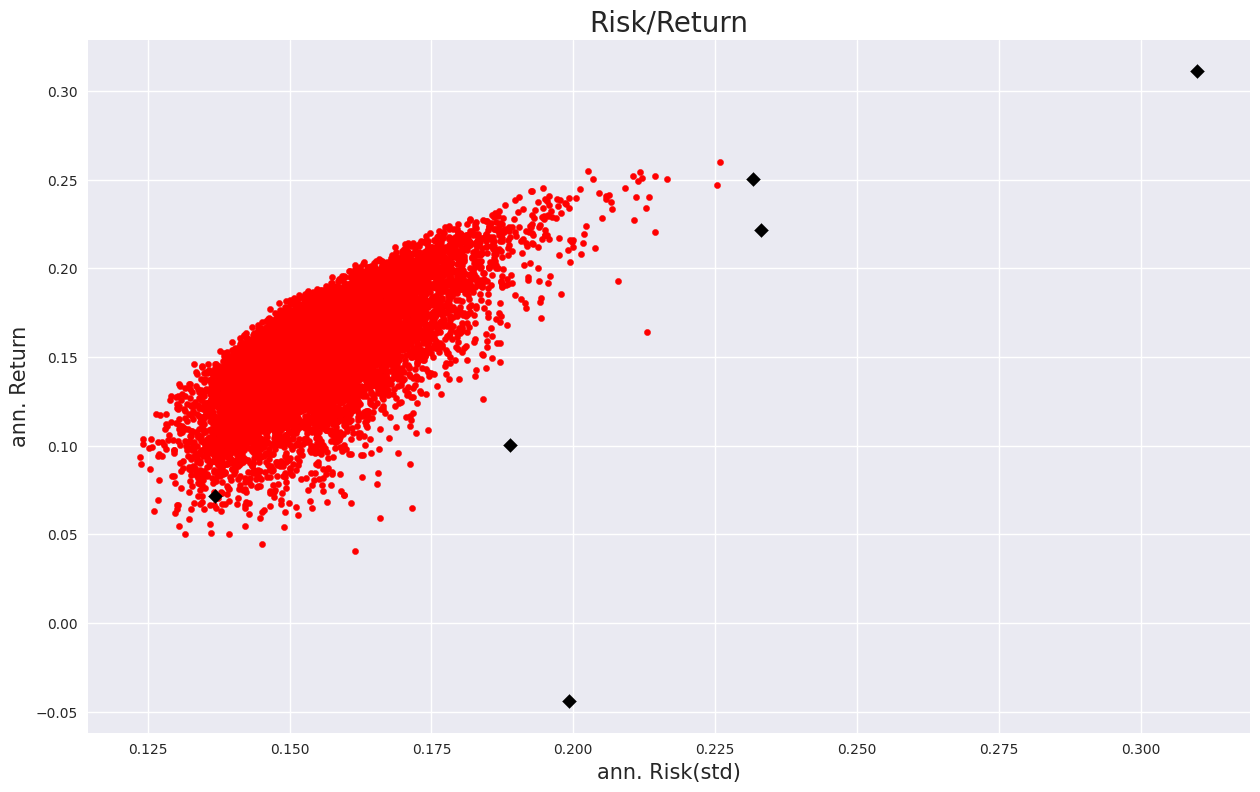

In [48]:
plt.figure(figsize = (15, 9))
plt.scatter(port_summary.loc[:, "Risk"], port_summary.loc[:, "Return"],s= 20, color = "red")
plt.scatter(summary.loc[:, "Risk"], summary.loc[:, "Return"], s= 50, color = "black", marker = "D")
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Risk/Return", fontsize = 20)
plt.show()

## What is the Sharpe Ratio and a Risk Free Asset? 

\begin{equation}
    SharpeRatio = \frac{PortReturn - RFR}{PortRisk}
\end{equation}

In [49]:
risk_free_return = 0.017
risk_free_risk = 0

In [50]:
rf = [risk_free_return, risk_free_risk]
rf

[0.017, 0]

## Portfolio Analysis with the Sharpe Ratio

In [51]:
summary

,Return,Risk
AMZN,0.3111,0.3100
BA,0.2214,0.2330
DIS,0.1006,0.1888
IBM,-0.0442,0.1993
KO,0.0717,0.1368
MSFT,0.2504,0.2317


In [52]:
port_summary.head()

,Return,Risk
0,0.1502,0.1534
1,0.1925,0.1712
2,0.1075,0.1588
3,0.1325,0.1466
4,0.1959,0.1724


In [53]:
summary["Sharpe"] = (summary["Return"].sub(rf[0]))/summary["Risk"]

In [54]:
summary

,Return,Risk,Sharpe
AMZN,0.3111,0.3100,0.9489
BA,0.2214,0.2330,0.8771
DIS,0.1006,0.1888,0.4428
IBM,-0.0442,0.1993,-0.3071
KO,0.0717,0.1368,0.3997
MSFT,0.2504,0.2317,1.0070


In [55]:
port_summary["Sharpe"] = (port_summary["Return"].sub(rf[0]))/port_summary["Risk"]

In [56]:
port_summary.head()

,Return,Risk,Sharpe
0,0.1502,0.1534,0.8683
1,0.1925,0.1712,1.0250
2,0.1075,0.1588,0.5696
3,0.1325,0.1466,0.7874
4,0.1959,0.1724,1.0380


In [57]:
port_summary.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Return  10000 non-null  float64
 1   Risk    10000 non-null  float64
 2   Sharpe  10000 non-null  float64
dtypes: float64(3)
memory usage: 312.5 KB


In [58]:
port_summary.describe()

,Return,Risk,Sharpe
count,10000.0000,10000.0000,10000.0000
mean,0.1518,0.1564,0.8562
std,0.0303,0.0124,0.1518
min,0.0406,0.1237,0.1458
25%,0.1318,0.1477,0.7612
50%,0.1518,0.1553,0.8674
75%,0.1721,0.1638,0.9691
max,0.2599,0.2259,1.1758


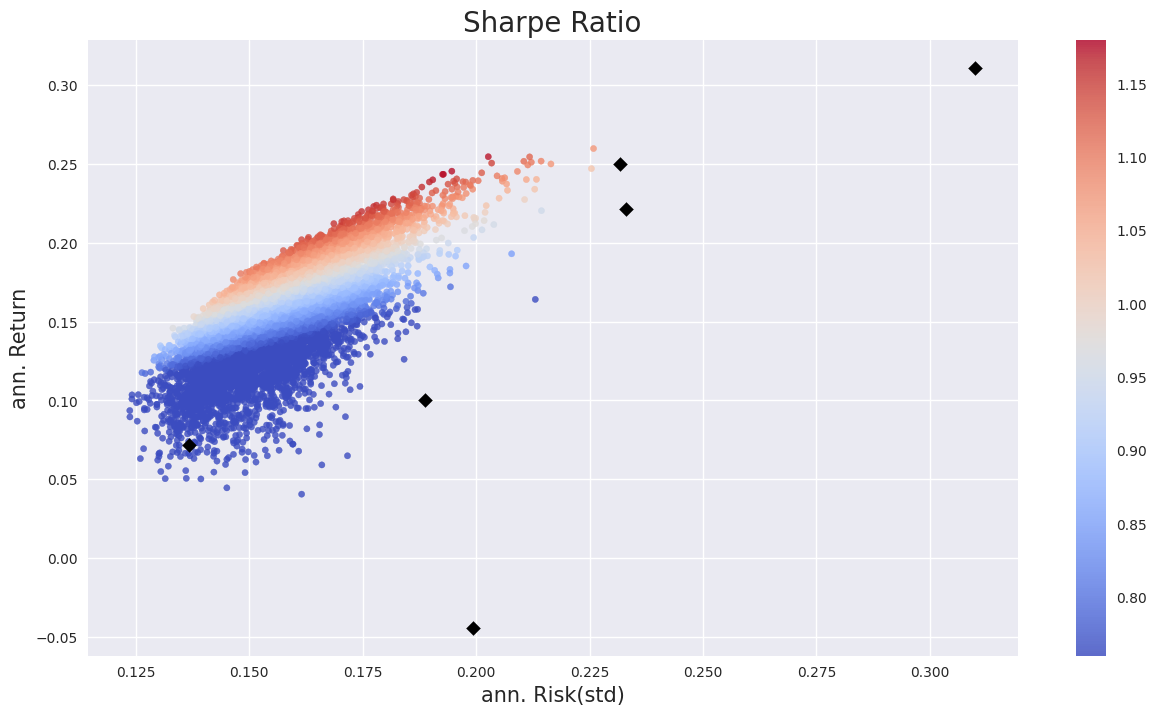

In [59]:
plt.figure(figsize = (15, 8))
plt.scatter(port_summary.loc[:, "Risk"], port_summary.loc[:, "Return"], s= 20, 
            c = port_summary.loc[:, "Sharpe"], cmap = "coolwarm", vmin = 0.76, vmax = 1.18, alpha = 0.8)
plt.colorbar()
plt.scatter(summary.loc[:, "Risk"], summary.loc[:, "Return"],s= 50, marker = "D", c = "black")
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Sharpe Ratio", fontsize = 20)
plt.show()

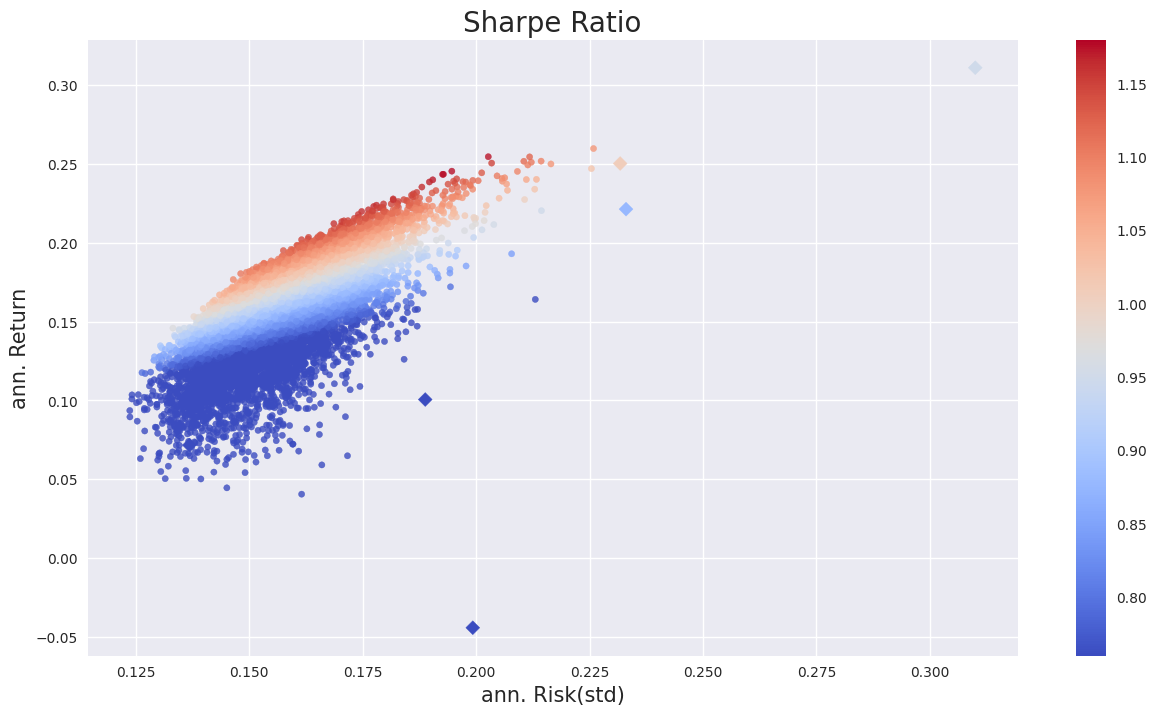

In [60]:
plt.figure(figsize = (15, 8))
plt.scatter(port_summary.loc[:, "Risk"], port_summary.loc[:, "Return"], s= 20, 
            c = port_summary.loc[:, "Sharpe"], cmap = "coolwarm", vmin = 0.76, vmax = 1.18, alpha = 0.8)
plt.scatter(summary.loc[:, "Risk"], summary.loc[:, "Return"],s= 50, marker = "D",
            c = summary.loc[:, "Sharpe"], cmap = "coolwarm", vmin = 0.76, vmax = 1.18,)
plt.colorbar()
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Sharpe Ratio", fontsize = 20)
plt.show()

## Finding the optimal Portfolio - The "Max Sharpe Ratio Portfolio"

In [61]:
port_summary.head()

,Return,Risk,Sharpe
0,0.1502,0.1534,0.8683
1,0.1925,0.1712,1.0250
2,0.1075,0.1588,0.5696
3,0.1325,0.1466,0.7874
4,0.1959,0.1724,1.0380


In [62]:
port_summary.describe()

,Return,Risk,Sharpe
count,10000.0000,10000.0000,10000.0000
mean,0.1518,0.1564,0.8562
std,0.0303,0.0124,0.1518
min,0.0406,0.1237,0.1458
25%,0.1318,0.1477,0.7612
50%,0.1518,0.1553,0.8674
75%,0.1721,0.1638,0.9691
max,0.2599,0.2259,1.1758


In [63]:
weights

array([[2.39884666e-01, 9.85548824e-02, 7.81343758e-02, 1.89889175e-01,
        2.47806474e-01, 1.45730427e-01],
       [2.71614294e-01, 1.89657765e-01, 1.33189995e-01, 1.08593608e-01,
        9.50402295e-02, 2.01904109e-01],
       [2.20141008e-01, 2.99552753e-02, 1.99798014e-01, 3.70436238e-01,
        9.16015868e-02, 8.80678770e-02],
       ...,
       [1.23972184e-01, 5.63875809e-01, 1.51332747e-04, 2.54348542e-03,
        1.19085267e-01, 1.90371922e-01],
       [3.43241600e-01, 6.19909399e-02, 1.84047993e-01, 7.04790714e-02,
        1.86897305e-01, 1.53343091e-01],
       [3.37593701e-01, 2.71803743e-01, 1.21932500e-01, 1.69909475e-02,
        1.88232052e-01, 6.34470553e-02]])

In [64]:
msrp = port_summary.Sharpe.idxmax()
msrp

np.int64(8374)

In [65]:
msrp_p = port_summary.iloc[msrp]
msrp_p

Return   0.2435
Risk     0.1926
Sharpe   1.1758
Name: 8374, dtype: float64

In [66]:
msrp_w = weights[msrp, :]
msrp_w

array([0.32777648, 0.33269367, 0.03028376, 0.00130715, 0.06852352,
       0.23941541])

In [67]:
pd.Series(index = stocks.columns, data = msrp_w)

AMZN   0.3278
BA     0.3327
DIS    0.0303
IBM    0.0013
KO     0.0685
MSFT   0.2394
dtype: float64

In [68]:
opt_weights = pd.Series(index = stocks.columns, data = 
                        np.array([2.59608281e-01, 3.48750774e-01, 2.42861287e-17, 5.20417043e-18, 8.89045781e-17, 3.91640945e-01]))

In [69]:
opt_weights

AMZN   0.2596
BA     0.3488
DIS    0.0000
IBM    0.0000
KO     0.0000
MSFT   0.3916
dtype: float64

In [70]:
ret["MP"] = ret.dot(opt_weights)

In [71]:
ret.head()

,AMZN,BA,DIS,IBM,KO,MSFT,MP
Date,,,,,,,
2014-01-03,-0.0038,0.0070,-0.0021,0.0060,-0.0049,-0.0067,-0.0012
2014-01-06,-0.0071,0.0057,-0.0038,-0.0034,-0.0047,-0.0211,-0.0081
2014-01-07,0.0112,0.0152,0.0069,0.0199,0.0030,0.0077,0.0112
2014-01-08,0.0098,0.0022,-0.0147,-0.0092,-0.0111,-0.0179,-0.0037
2014-01-09,-0.0023,0.0093,-0.0043,-0.0031,-0.0053,-0.0064,0.0001


In [72]:
summary = ann_risk_return(ret)

In [73]:
summary["Sharpe"] = (summary["Return"].sub(rf[0]))/summary["Risk"]

In [74]:
summary

,Return,Risk,Sharpe
AMZN,0.3111,0.3100,0.9489
BA,0.2214,0.2330,0.8771
DIS,0.1006,0.1888,0.4428
IBM,-0.0442,0.1993,-0.3071
KO,0.0717,0.1368,0.3997
MSFT,0.2504,0.2317,1.0070
MP,0.2560,0.1998,1.1966


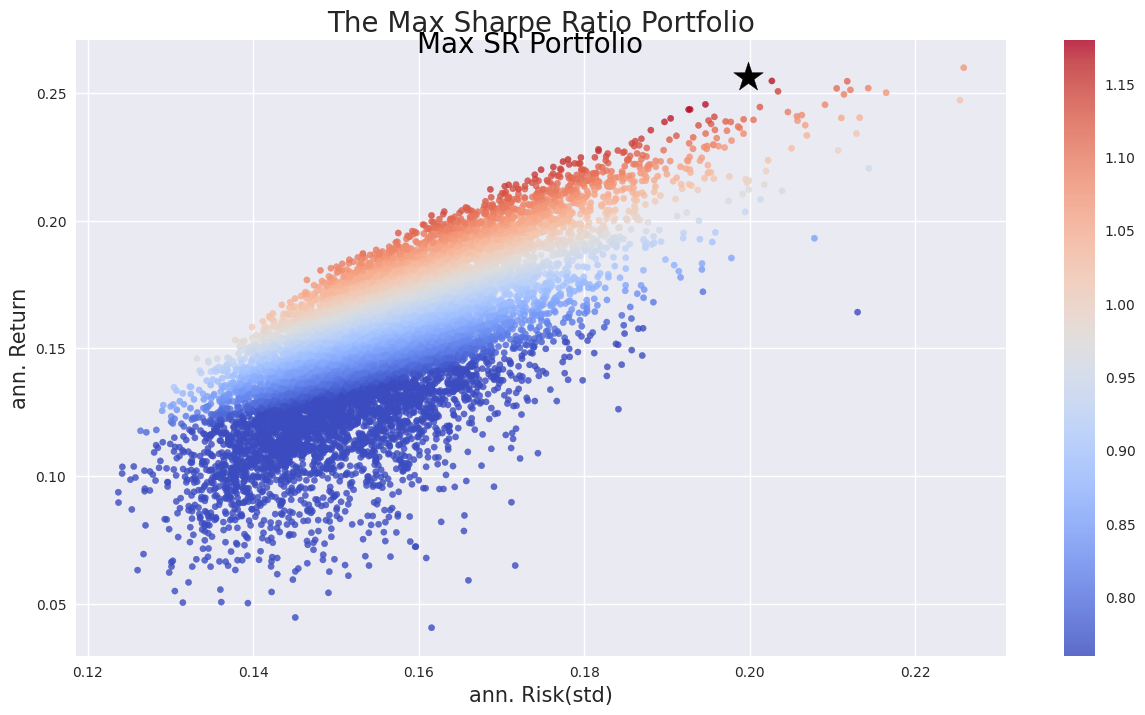

In [75]:
plt.figure(figsize = (15, 8))
plt.scatter(port_summary.loc[:, "Risk"], port_summary.loc[:, "Return"], s= 20, c = port_summary.loc[:, "Sharpe"], cmap = "coolwarm", vmin = 0.76, vmax = 1.18, alpha = 0.8)
plt.colorbar()
plt.scatter(summary.loc["MP", "Risk"], summary.loc["MP", "Return"],s= 500, c = "black", marker = "*")
plt.annotate("Max SR Portfolio", xy=(summary.loc["MP", "Risk"]-0.04, summary.loc["MP", "Return"]+0.01), size = 20, color = "black")
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("The Max Sharpe Ratio Portfolio", fontsize = 20)
plt.show()

----------------------------------------

## The Sharpe Ratio - a graphical intuition (PP)

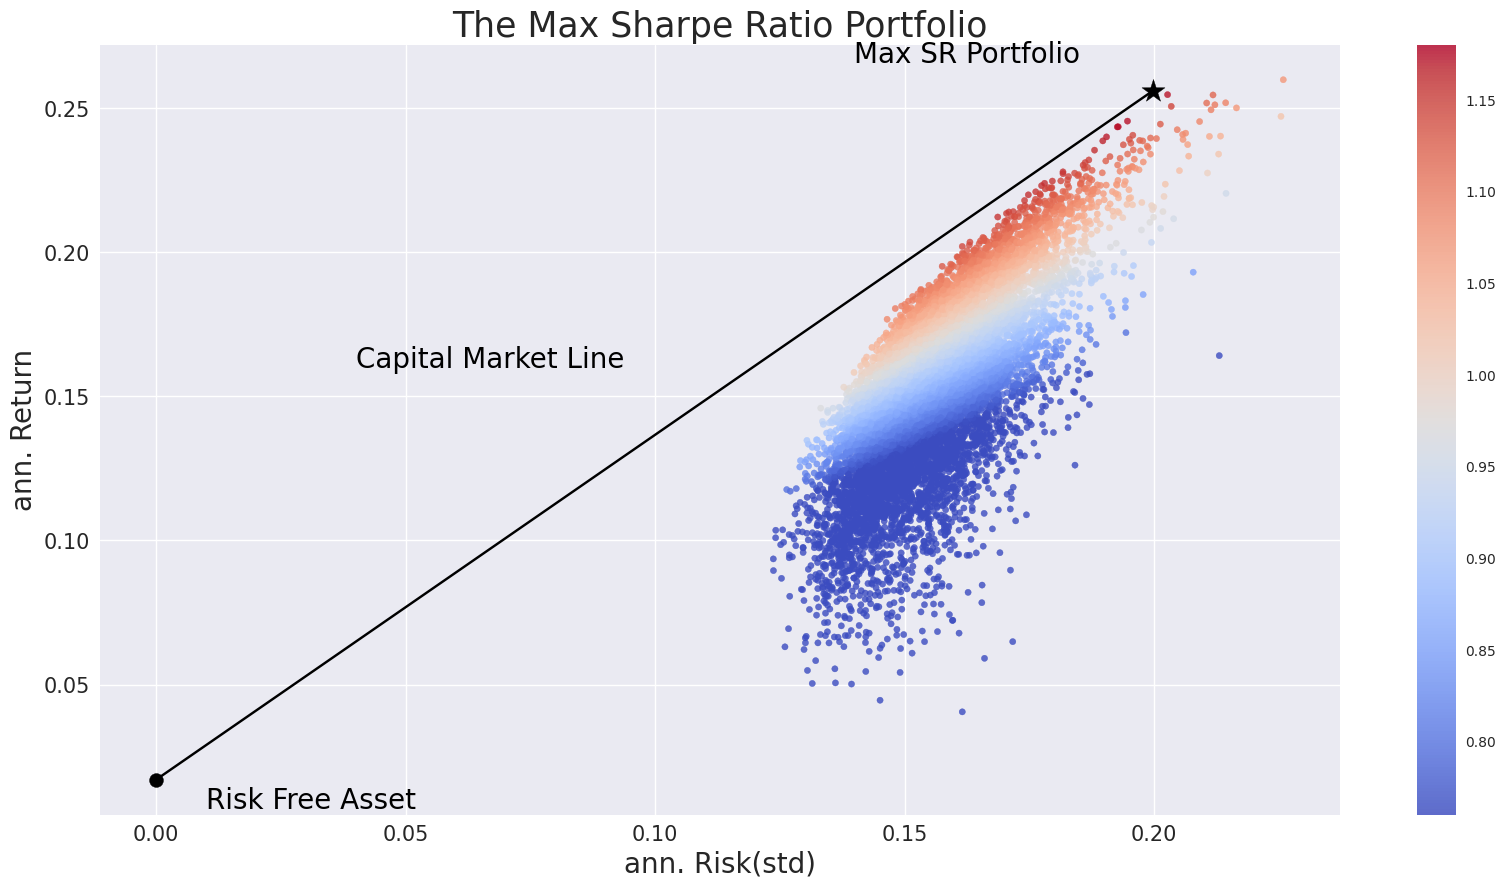

In [76]:
plt.figure(figsize = (20, 10))
plt.scatter(port_summary.loc[:, "Risk"], port_summary.loc[:, "Return"], s= 20, c = port_summary.loc[:, "Sharpe"], cmap = "coolwarm", vmin = 0.76, vmax = 1.18, alpha = 0.8)
plt.colorbar()
plt.scatter(summary.loc["MP", "Risk"], summary.loc["MP", "Return"],s= 300, c = "black", marker = "*")
plt.annotate("Max SR Portfolio", xy=(summary.loc["MP", "Risk"]-0.06, summary.loc["MP", "Return"]+0.01), size = 20, color = "black")
plt.scatter(rf[1], rf[0], s = 100, marker = "o", c = "black")
plt.annotate("Risk Free Asset", xy = (rf[1] + 0.01, rf[0] - 0.01), size = 20, color = "black")
plt.xlabel("ann. Risk(std)", fontsize = 20)
plt.ylabel("ann. Return", fontsize = 20)
plt.tick_params(axis = "both", labelsize = 15)
plt.title("The Max Sharpe Ratio Portfolio", fontsize = 25)
plt.plot([rf[1],summary.loc["MP", "Risk"]], [rf[0],summary.loc["MP", "Return"]], c = "black")
plt.annotate("Capital Market Line", xy = (0.04, 0.16), size = 20, color = "black")
plt.show()

## Capital Market Line & Two-Fund-Theorem (PP)

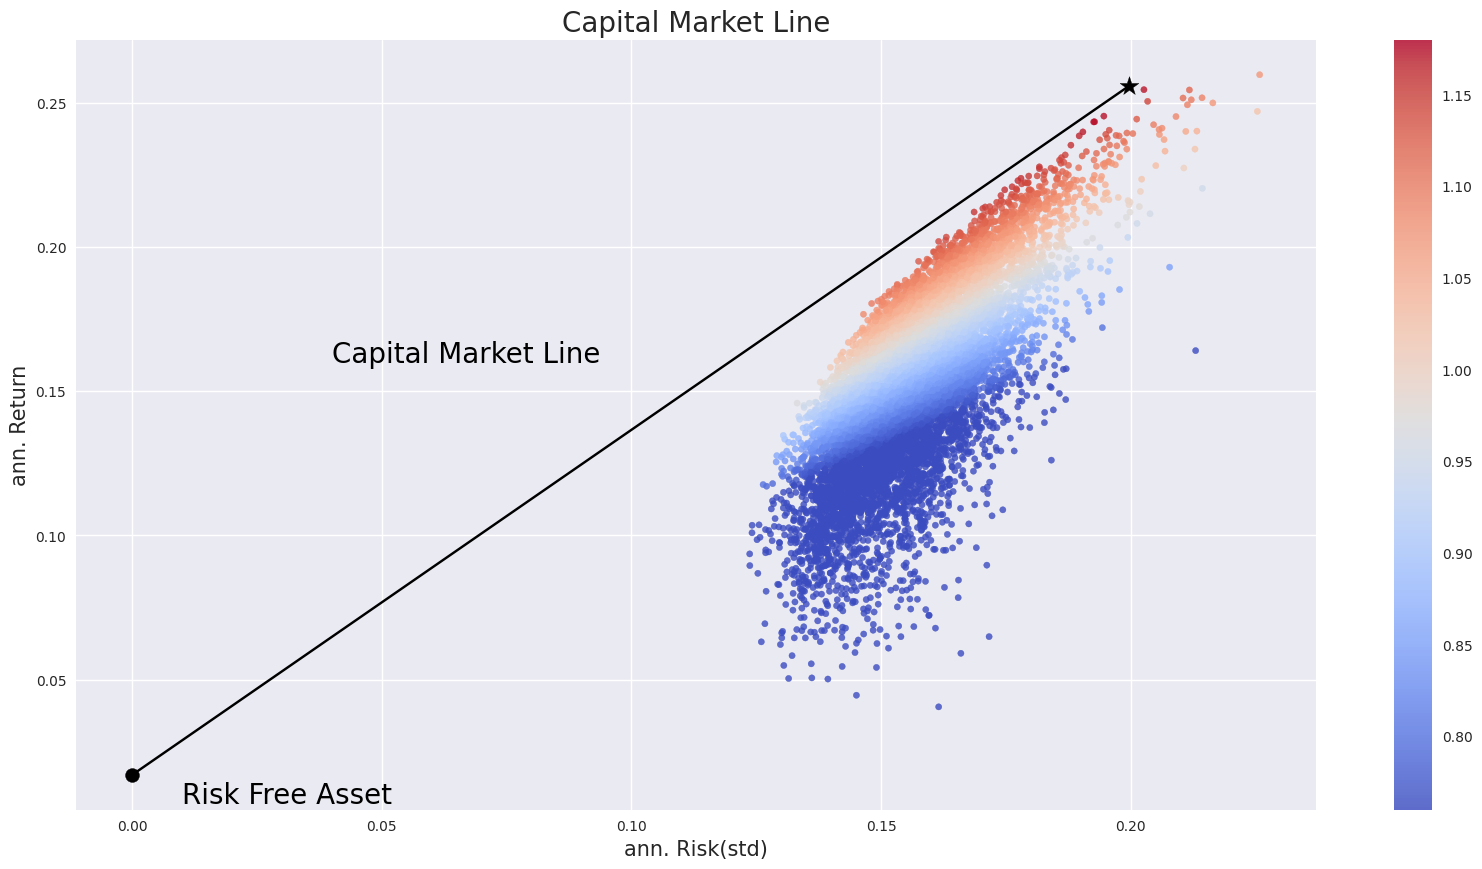

In [77]:
plt.figure(figsize = (20, 10))
plt.scatter(port_summary.loc[:, "Risk"], port_summary.loc[:, "Return"], s= 20, c = port_summary.iloc[:, 2], cmap = "coolwarm", vmin = 0.76, vmax = 1.18, alpha = 0.8)
plt.colorbar()
plt.scatter(summary.loc["MP", "Risk"], summary.loc["MP", "Return"],s= 200, c = "black", marker = "*")
plt.annotate("Market Portfolio", xy=(summary.iloc[6, 1], summary.iloc[6, 0]+0.02), size = 20, color = "black")
plt.scatter(rf[1], rf[0], s = 100, marker = "o", c = "black")
plt.annotate("Risk Free Asset", xy = (rf[1] + 0.01, rf[0] - 0.01), size = 20, color = "black")
plt.plot([rf[1],summary.loc["MP", "Risk"]], [rf[0],summary.loc["MP", "Return"]], c = "black")
plt.annotate("Capital Market Line", xy = (0.04, 0.16), size = 20, color = "black")
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Capital Market Line", fontsize = 20)
plt.show()

--------------------------------------

## The Portfolio Diversification Effect

In [78]:
summary

,Return,Risk,Sharpe
AMZN,0.3111,0.3100,0.9489
BA,0.2214,0.2330,0.8771
DIS,0.1006,0.1888,0.4428
IBM,-0.0442,0.1993,-0.3071
KO,0.0717,0.1368,0.3997
MSFT,0.2504,0.2317,1.0070
MP,0.2560,0.1998,1.1966


In [79]:
opt_weights

AMZN   0.2596
BA     0.3488
DIS    0.0000
IBM    0.0000
KO     0.0000
MSFT   0.3916
dtype: float64

In [80]:
weighted_av = summary.loc[:"MSFT", ["Return", "Risk"]].T.dot(opt_weights)
weighted_av

Return   0.2560
Risk     0.2525
dtype: float64

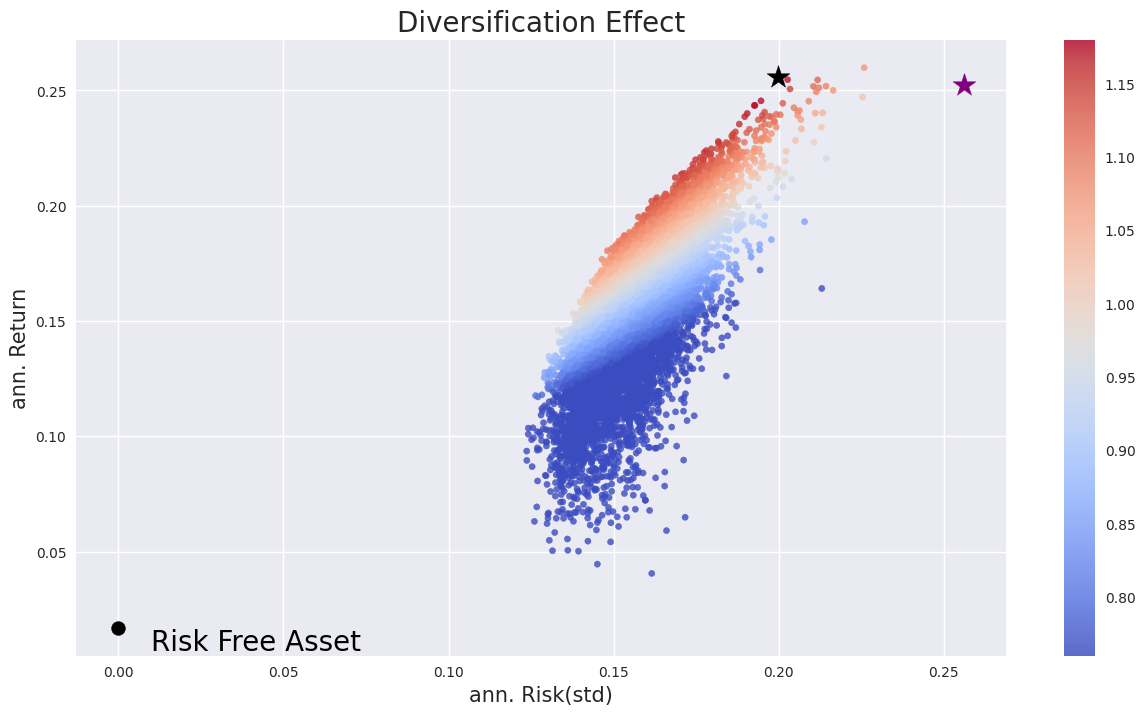

In [81]:
plt.figure(figsize = (15, 8))
plt.scatter(port_summary.loc[:, "Risk"], port_summary.loc[:, "Return"], s= 20, c = port_summary.loc[:, "Sharpe"], cmap = "coolwarm", vmin = 0.76, vmax = 1.18, alpha = 0.8)
plt.colorbar()
plt.scatter(summary.loc["MP", "Risk"], summary.loc["MP", "Return"],s= 300, c = "black", marker = "*")
plt.annotate("Market Portfolio", xy=(summary.loc["MP", "Risk"], summary.loc["MP", "Return"]+0.02), size = 20, color = "black")
plt.scatter(rf[1], rf[0], s = 100, marker = "o", c = "black")
plt.annotate("Risk Free Asset", xy = (rf[1] + 0.01, rf[0] - 0.01), size = 20, color = "black")
plt.scatter(weighted_av.Return, weighted_av.Risk,s= 300, c = "purple", marker = "*")
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Diversification Effect", fontsize = 20)
plt.show()

In [82]:
three_stocks = pd.DataFrame(data = {"A": [0.05, 0.1, -0.02, 0.04, 0.06, -0.04, 0.03, 0.15, 0.06, 0.02], 
                                  "B": [0.05, 0.0, 0.12, 0.06, 0.04, 0.14, 0.07, -0.05, 0.04, 0.08], 
                                  "C": [0.1, 0.2, -0.04, 0.08, 0.12, -0.08, 0.06, 0.3, 0.12, 0.04]},
            index = range(1, 11))
three_stocks

,A,B,C
1,0.0500,0.0500,0.1000
2,0.1000,0.0000,0.2000
3,-0.0200,0.1200,-0.0400
4,0.0400,0.0600,0.0800
5,0.0600,0.0400,0.1200
6,-0.0400,0.1400,-0.0800
7,0.0300,0.0700,0.0600
8,0.1500,-0.0500,0.3000
9,0.0600,0.0400,0.1200
10,0.0200,0.0800,0.0400


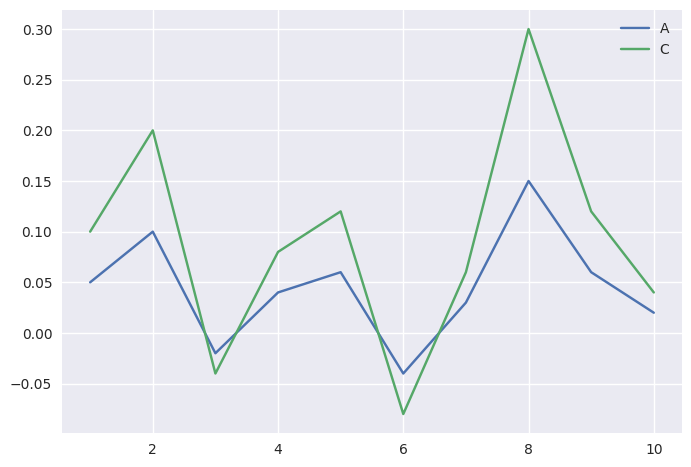

In [83]:
three_stocks.loc[:, ["A", "C"]].plot()
plt.show()

In [84]:
three_stocks.iloc[:, :3].corr()

,A,B,C
A,1.0000,-1.0000,1.0000
B,-1.0000,1.0000,-1.0000
C,1.0000,-1.0000,1.0000


In [85]:
three_stocks["AB"] = three_stocks[["A", "B"]].mean(axis = 1)

In [86]:
three_stocks["AC"] = three_stocks[["A", "C"]].mean(axis = 1)

In [87]:
three_stocks

,A,B,C,AB,AC
1,0.0500,0.0500,0.1000,0.0500,0.0750
2,0.1000,0.0000,0.2000,0.0500,0.1500
3,-0.0200,0.1200,-0.0400,0.0500,-0.0300
4,0.0400,0.0600,0.0800,0.0500,0.0600
5,0.0600,0.0400,0.1200,0.0500,0.0900
6,-0.0400,0.1400,-0.0800,0.0500,-0.0600
7,0.0300,0.0700,0.0600,0.0500,0.0450
8,0.1500,-0.0500,0.3000,0.0500,0.2250
9,0.0600,0.0400,0.1200,0.0500,0.0900
10,0.0200,0.0800,0.0400,0.0500,0.0300


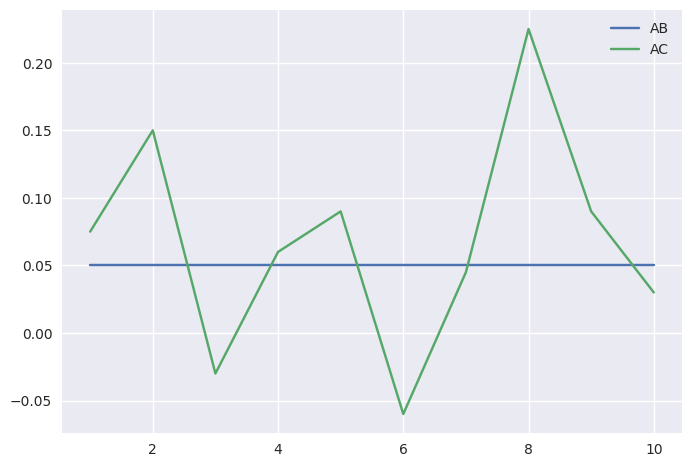

In [88]:
three_stocks.loc[:, ["AB", "AC"]].plot()
plt.show()

In [89]:
summ = three_stocks.agg(["mean", "std"])
summ

,A,B,C,AB,AC
mean,0.0450,0.0550,0.0900,0.0500,0.0675
std,0.0546,0.0546,0.1092,0.0000,0.0819


In [90]:
summ[["A", "B"]].mean(axis = 1)

mean   0.0500
std    0.0546
dtype: float64

In [91]:
summ[["A", "C"]].mean(axis = 1)

mean   0.0675
std    0.0819
dtype: float64

In [92]:
ret.corr()

,AMZN,BA,DIS,IBM,KO,MSFT,MP
AMZN,1.0000,0.3617,0.3412,0.3000,0.2117,0.5331,0.7922
BA,0.3617,1.0000,0.4186,0.4096,0.3141,0.4112,0.7394
DIS,0.3412,0.4186,1.0000,0.3896,0.3236,0.4048,0.4917
IBM,0.3000,0.4096,0.3896,1.0000,0.3364,0.4648,0.4987
KO,0.2117,0.3141,0.3236,0.3364,1.0000,0.3394,0.3673
MSFT,0.5331,0.4112,0.4048,0.4648,0.3394,1.0000,0.8364
MP,0.7922,0.7394,0.4917,0.4987,0.3673,0.8364,1.0000


## Systematic vs. unsystematic (diversifiable) Risk

In [93]:
summary

,Return,Risk,Sharpe
AMZN,0.3111,0.3100,0.9489
BA,0.2214,0.2330,0.8771
DIS,0.1006,0.1888,0.4428
IBM,-0.0442,0.1993,-0.3071
KO,0.0717,0.1368,0.3997
MSFT,0.2504,0.2317,1.0070
MP,0.2560,0.1998,1.1966


In [94]:
summary["TotalRisk_var"] = np.power(summary.Risk, 2)

In [95]:
summary

,Return,Risk,Sharpe,TotalRisk_var
AMZN,0.3111,0.3100,0.9489,0.0961
BA,0.2214,0.2330,0.8771,0.0543
DIS,0.1006,0.1888,0.4428,0.0356
IBM,-0.0442,0.1993,-0.3071,0.0397
KO,0.0717,0.1368,0.3997,0.0187
MSFT,0.2504,0.2317,1.0070,0.0537
MP,0.2560,0.1998,1.1966,0.0399


In [96]:
ret.head()

,AMZN,BA,DIS,IBM,KO,MSFT,MP
Date,,,,,,,
2014-01-03,-0.0038,0.0070,-0.0021,0.0060,-0.0049,-0.0067,-0.0012
2014-01-06,-0.0071,0.0057,-0.0038,-0.0034,-0.0047,-0.0211,-0.0081
2014-01-07,0.0112,0.0152,0.0069,0.0199,0.0030,0.0077,0.0112
2014-01-08,0.0098,0.0022,-0.0147,-0.0092,-0.0111,-0.0179,-0.0037
2014-01-09,-0.0023,0.0093,-0.0043,-0.0031,-0.0053,-0.0064,0.0001


In [97]:
COV = ret.cov()*252

In [98]:
COV

,AMZN,BA,DIS,IBM,KO,MSFT,MP
AMZN,0.0961,0.0261,0.0200,0.0185,0.0090,0.0383,0.0491
BA,0.0261,0.0543,0.0184,0.0190,0.0100,0.0222,0.0344
DIS,0.0200,0.0184,0.0356,0.0147,0.0084,0.0177,0.0185
IBM,0.0185,0.0190,0.0147,0.0397,0.0092,0.0215,0.0198
KO,0.0090,0.0100,0.0084,0.0092,0.0187,0.0108,0.0100
MSFT,0.0383,0.0222,0.0177,0.0215,0.0108,0.0537,0.0387
MP,0.0491,0.0344,0.0185,0.0198,0.0100,0.0387,0.0399


In [99]:
opt_weights

AMZN   0.2596
BA     0.3488
DIS    0.0000
IBM    0.0000
KO     0.0000
MSFT   0.3916
dtype: float64

In [100]:
COV.iloc[:-1, -1].dot(opt_weights)

np.float64(0.03990124365180914)

In [101]:
COV.iloc[-1, -1]

np.float64(0.03990124365180912)

In [102]:
summary["SystRisk_var"] = COV.iloc[:, -1]

In [103]:
summary

,Return,Risk,Sharpe,TotalRisk_var,SystRisk_var
AMZN,0.3111,0.3100,0.9489,0.0961,0.0491
BA,0.2214,0.2330,0.8771,0.0543,0.0344
DIS,0.1006,0.1888,0.4428,0.0356,0.0185
IBM,-0.0442,0.1993,-0.3071,0.0397,0.0198
KO,0.0717,0.1368,0.3997,0.0187,0.0100
MSFT,0.2504,0.2317,1.0070,0.0537,0.0387
MP,0.2560,0.1998,1.1966,0.0399,0.0399


In [104]:
summary["UnsystRisk_var"] = summary["TotalRisk_var"].sub(summary["SystRisk_var"])

In [105]:
summary

,Return,Risk,Sharpe,TotalRisk_var,SystRisk_var,UnsystRisk_var
AMZN,0.3111,0.3100,0.9489,0.0961,0.0491,0.0470
BA,0.2214,0.2330,0.8771,0.0543,0.0344,0.0199
DIS,0.1006,0.1888,0.4428,0.0356,0.0185,0.0171
IBM,-0.0442,0.1993,-0.3071,0.0397,0.0198,0.0199
KO,0.0717,0.1368,0.3997,0.0187,0.0100,0.0087
MSFT,0.2504,0.2317,1.0070,0.0537,0.0387,0.0150
MP,0.2560,0.1998,1.1966,0.0399,0.0399,0.0000


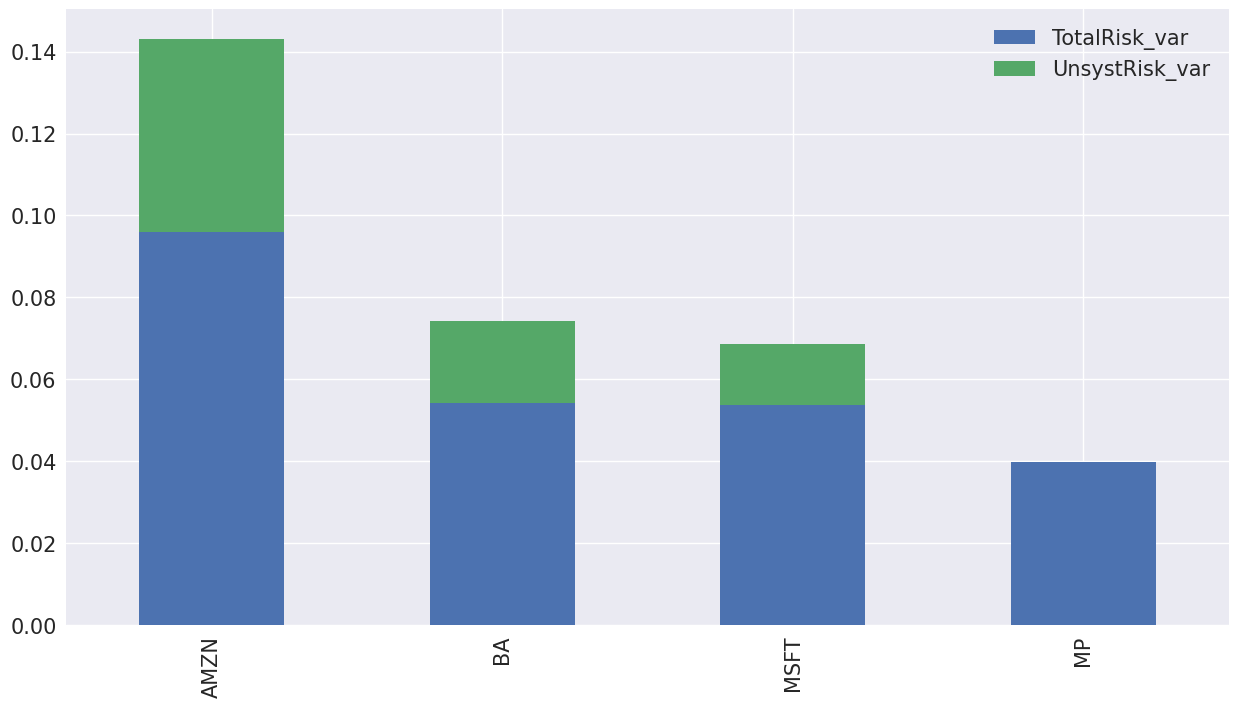

In [106]:
summary.iloc[[0, 1, 5, 6], [3,5]].plot(kind = "bar", stacked = True, figsize= (15, 8), fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

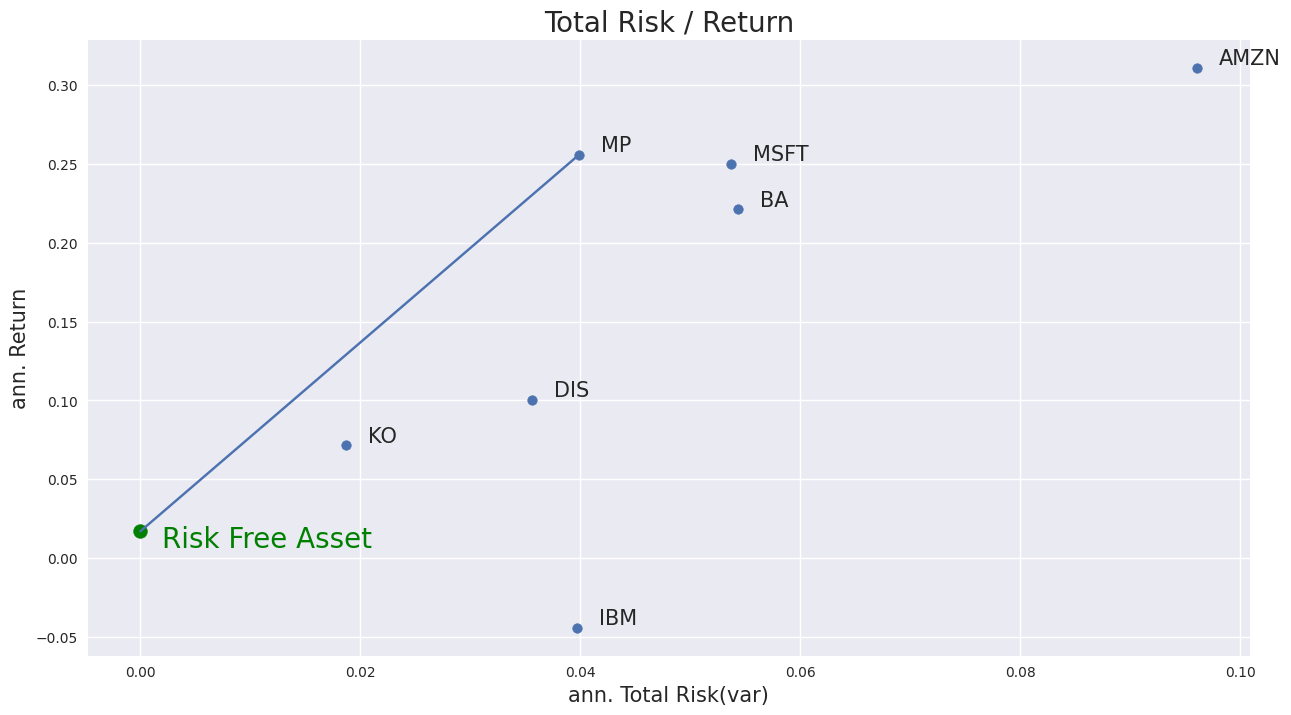

In [107]:
plt.figure(figsize = (15, 8))
plt.scatter(summary.TotalRisk_var, summary.Return)
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "TotalRisk_var"]+0.002, summary.loc[i, "Return"]+0.002), size = 15)
plt.plot([rf[1], summary.loc["MP", "TotalRisk_var"]], [rf[0], summary.loc["MP", "Return"]])
plt.scatter(rf[1], rf[0], s = 100, marker = "o", c = "green")
plt.annotate("Risk Free Asset", xy = (rf[1] + 0.002, rf[0] - 0.01), size = 20, color = "green")
plt.xlabel("ann. Total Risk(var)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Total Risk / Return", fontsize = 20)
plt.show()

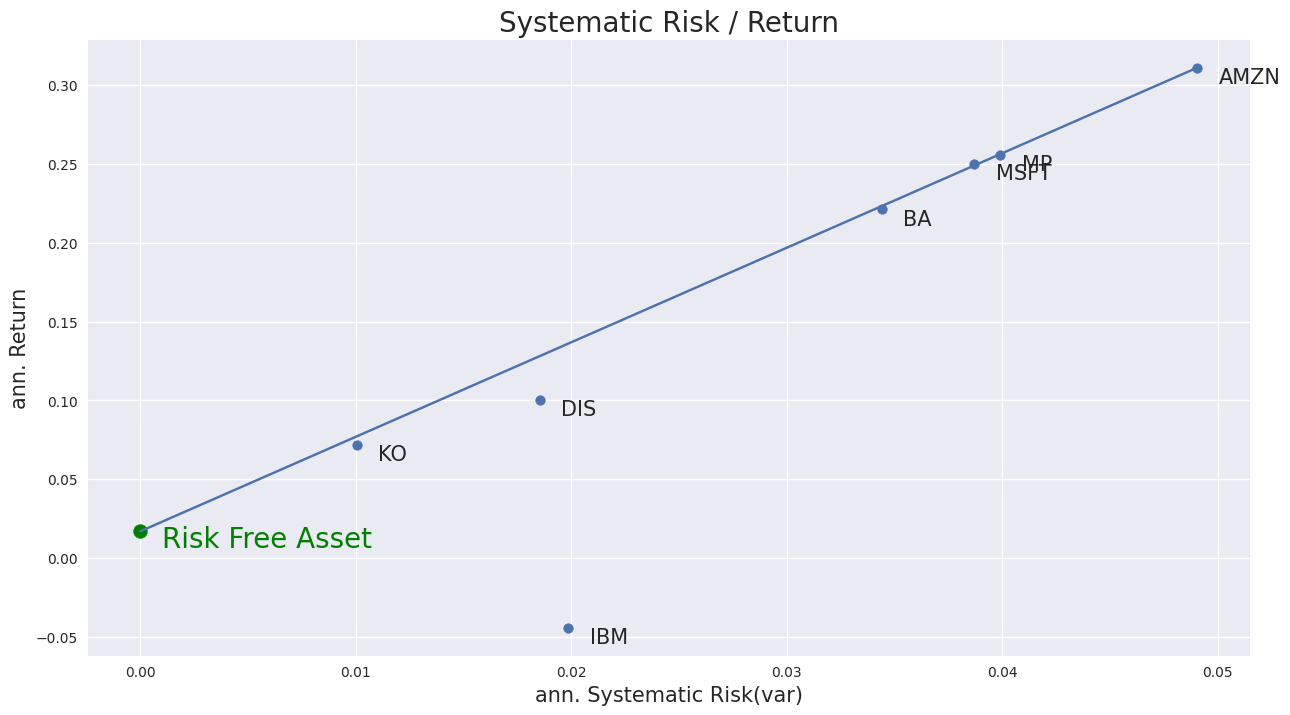

In [108]:
plt.figure(figsize = (15, 8))
plt.scatter(summary.SystRisk_var, summary.Return)
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "SystRisk_var"]+0.001, summary.loc[i, "Return"]-0.01), size = 15)
plt.plot([rf[1], summary.loc["AMZN", "SystRisk_var"]], [rf[0], summary.loc["AMZN", "Return"]])
plt.scatter(rf[1], rf[0], s = 100, marker = "o", c = "green")
plt.annotate("Risk Free Asset", xy = (rf[1] + 0.001, rf[0] - 0.01), size = 20, color = "green")
plt.xlabel("ann. Systematic Risk(var)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Systematic Risk / Return", fontsize = 20)
plt.show()

### CAPM & the Security Market Line

In [109]:
pd.options.display.float_format = '{:.2f}'.format

In [110]:
summary

,Return,Risk,Sharpe,TotalRisk_var,SystRisk_var,UnsystRisk_var
AMZN,0.31,0.31,0.95,0.10,0.05,0.05
BA,0.22,0.23,0.88,0.05,0.03,0.02
DIS,0.10,0.19,0.44,0.04,0.02,0.02
IBM,-0.04,0.20,-0.31,0.04,0.02,0.02
KO,0.07,0.14,0.40,0.02,0.01,0.01
MSFT,0.25,0.23,1.01,0.05,0.04,0.01
MP,0.26,0.20,1.20,0.04,0.04,0.00


In [111]:
summary.SystRisk_var / summary.loc["MP", "SystRisk_var"]

AMZN   1.23
BA     0.86
DIS    0.46
IBM    0.50
KO     0.25
MSFT   0.97
MP     1.00
Name: SystRisk_var, dtype: float64

In [112]:
summary["beta"] = summary.SystRisk_var / summary.loc["MP", "SystRisk_var"]

In [113]:
summary

,Return,Risk,Sharpe,TotalRisk_var,SystRisk_var,UnsystRisk_var,beta
AMZN,0.31,0.31,0.95,0.10,0.05,0.05,1.23
BA,0.22,0.23,0.88,0.05,0.03,0.02,0.86
DIS,0.10,0.19,0.44,0.04,0.02,0.02,0.46
IBM,-0.04,0.20,-0.31,0.04,0.02,0.02,0.50
KO,0.07,0.14,0.40,0.02,0.01,0.01,0.25
MSFT,0.25,0.23,1.01,0.05,0.04,0.01,0.97
MP,0.26,0.20,1.20,0.04,0.04,0.00,1.00


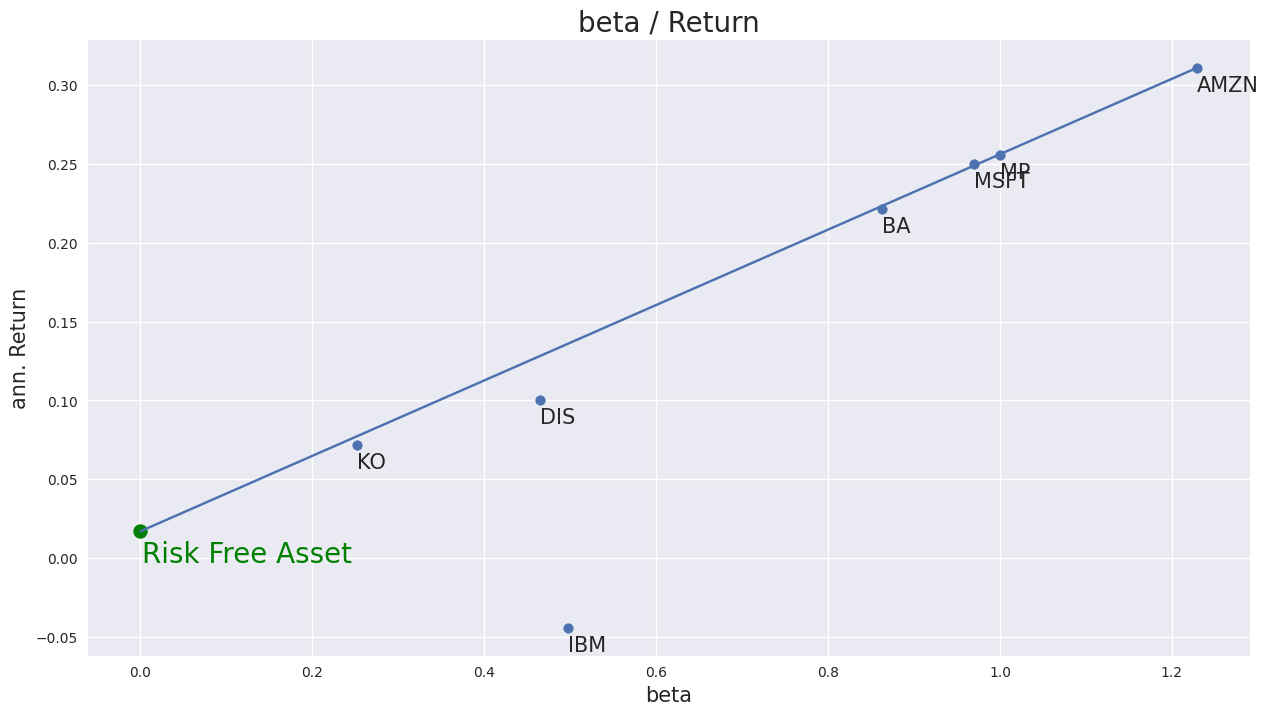

In [114]:
plt.figure(figsize = (15, 8))
plt.scatter(summary.beta, summary.Return)
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "beta"]+0.00, summary.loc[i, "Return"]-0.015), size = 15)
plt.plot([rf[1], summary.loc["AMZN", "beta"]], [rf[0], summary.loc["AMZN", "Return"]])
plt.scatter(rf[1], rf[0], s = 100, marker = "o", c = "green")
plt.annotate("Risk Free Asset", xy = (rf[1] + 0.002, rf[0] - 0.02), size = 20, color = "green")
plt.xlabel("beta", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("beta / Return", fontsize = 20)
plt.show()

y =      i  +         slope           * x

Return = RFR + (Market Portfolio Return - RFR) * beta

In [115]:
rf[0] + (summary.loc["MP", "Return"] - rf[0]) * summary.loc["AMZN", "beta"]

np.float64(0.3108715506463943)

In [116]:
summary["capm_ret"] = rf[0] + (summary.loc["MP", "Return"] - rf[0]) * summary.beta

In [117]:
summary

,Return,Risk,Sharpe,TotalRisk_var,SystRisk_var,UnsystRisk_var,beta,capm_ret
AMZN,0.31,0.31,0.95,0.10,0.05,0.05,1.23,0.31
BA,0.22,0.23,0.88,0.05,0.03,0.02,0.86,0.22
DIS,0.10,0.19,0.44,0.04,0.02,0.02,0.46,0.13
IBM,-0.04,0.20,-0.31,0.04,0.02,0.02,0.50,0.14
KO,0.07,0.14,0.40,0.02,0.01,0.01,0.25,0.08
MSFT,0.25,0.23,1.01,0.05,0.04,0.01,0.97,0.25
MP,0.26,0.20,1.20,0.04,0.04,0.00,1.00,0.26


## Beta and Alpha

In [118]:
summary

,Return,Risk,Sharpe,TotalRisk_var,SystRisk_var,UnsystRisk_var,beta,capm_ret
AMZN,0.31,0.31,0.95,0.10,0.05,0.05,1.23,0.31
BA,0.22,0.23,0.88,0.05,0.03,0.02,0.86,0.22
DIS,0.10,0.19,0.44,0.04,0.02,0.02,0.46,0.13
IBM,-0.04,0.20,-0.31,0.04,0.02,0.02,0.50,0.14
KO,0.07,0.14,0.40,0.02,0.01,0.01,0.25,0.08
MSFT,0.25,0.23,1.01,0.05,0.04,0.01,0.97,0.25
MP,0.26,0.20,1.20,0.04,0.04,0.00,1.00,0.26


In [119]:
summary["alpha"] = summary.Return - summary.capm_ret

In [120]:
ret.head()

,AMZN,BA,DIS,IBM,KO,MSFT,MP
Date,,,,,,,
2014-01-03,-0.00,0.01,-0.00,0.01,-0.00,-0.01,-0.00
2014-01-06,-0.01,0.01,-0.00,-0.00,-0.00,-0.02,-0.01
2014-01-07,0.01,0.02,0.01,0.02,0.00,0.01,0.01
2014-01-08,0.01,0.00,-0.01,-0.01,-0.01,-0.02,-0.00
2014-01-09,-0.00,0.01,-0.00,-0.00,-0.01,-0.01,0.00


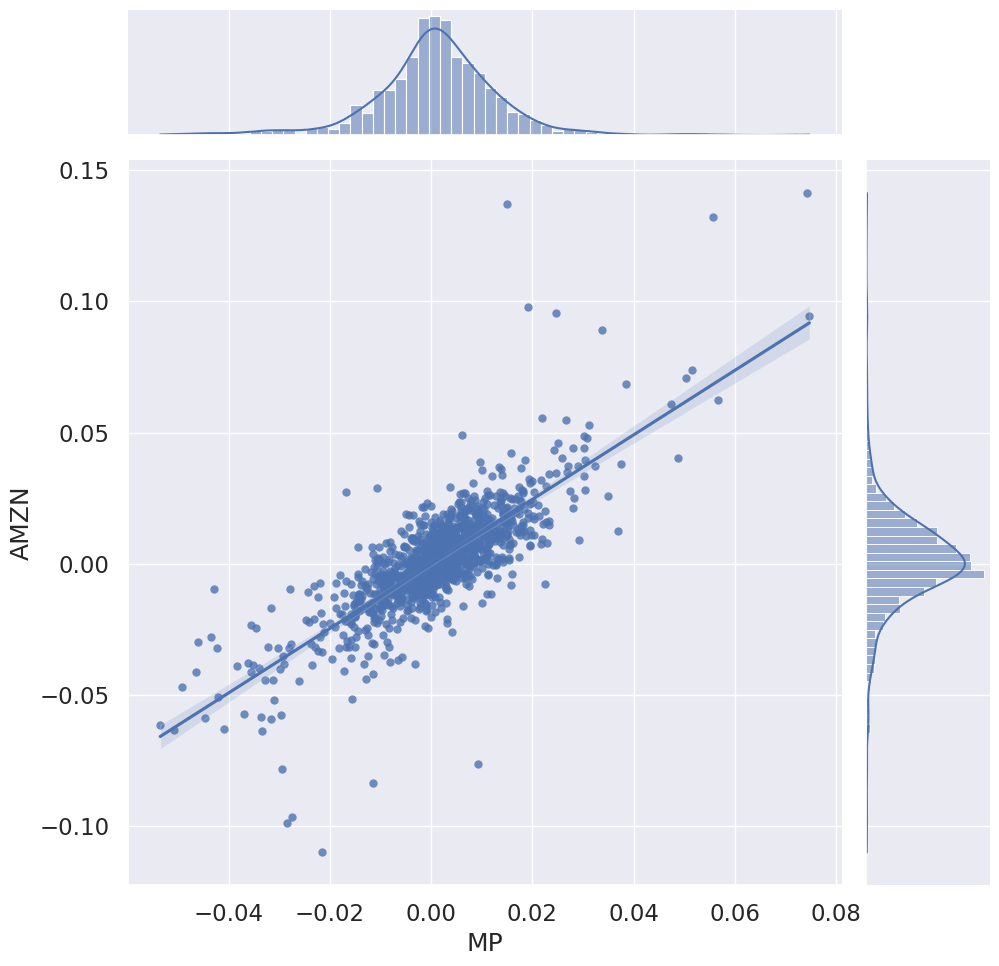

In [121]:
sns.set(font_scale=1.5)
sns.jointplot(data = ret, x = "MP", y = "AMZN", height = 10, kind = "reg")
plt.show()

In [122]:
np.polyfit(ret.MP, ret.AMZN, 1)

array([ 1.22942050e+00, -1.44441074e-05])

In [123]:
AMZN_beta = np.polyfit(ret.MP, ret.AMZN, 1)[0]
AMZN_beta

np.float64(1.2294205036417005)

In [124]:
summary

,Return,Risk,Sharpe,TotalRisk_var,SystRisk_var,UnsystRisk_var,beta,capm_ret,alpha
AMZN,0.31,0.31,0.95,0.10,0.05,0.05,1.23,0.31,0.00
BA,0.22,0.23,0.88,0.05,0.03,0.02,0.86,0.22,-0.00
DIS,0.10,0.19,0.44,0.04,0.02,0.02,0.46,0.13,-0.03
IBM,-0.04,0.20,-0.31,0.04,0.02,0.02,0.50,0.14,-0.18
KO,0.07,0.14,0.40,0.02,0.01,0.01,0.25,0.08,-0.01
MSFT,0.25,0.23,1.01,0.05,0.04,0.01,0.97,0.25,0.00
MP,0.26,0.20,1.20,0.04,0.04,0.00,1.00,0.26,0.00


## Final Considerations (and a more real world scenario)

In [125]:
ret.drop(columns = ["MP"], inplace =True)

In [126]:
ret

,AMZN,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2014-01-03,-0.00,0.01,-0.00,0.01,-0.00,-0.01
2014-01-06,-0.01,0.01,-0.00,-0.00,-0.00,-0.02
2014-01-07,0.01,0.02,0.01,0.02,0.00,0.01
2014-01-08,0.01,0.00,-0.01,-0.01,-0.01,-0.02
2014-01-09,-0.00,0.01,-0.00,-0.00,-0.01,-0.01
...,...,...,...,...,...,...
2018-12-21,-0.06,-0.03,-0.03,-0.02,0.00,-0.03
2018-12-24,-0.02,-0.03,-0.04,-0.03,-0.03,-0.04
2018-12-26,0.09,0.07,0.05,0.04,0.02,0.07


In [127]:
mcap_weights = pd.read_csv("data/mcap_weights.csv", parse_dates = ["Date"], index_col = "Date")

In [128]:
mcap_weights

,AMZN,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2013-12-31,0.19,0.07,0.13,0.16,0.17,0.28
2014-01-02,0.19,0.07,0.13,0.16,0.17,0.28
2014-01-03,0.19,0.08,0.13,0.16,0.17,0.27
2014-01-06,0.19,0.08,0.13,0.16,0.17,0.27
2014-01-07,0.19,0.08,0.13,0.16,0.17,0.27
...,...,...,...,...,...,...
2018-12-21,0.32,0.08,0.09,0.05,0.10,0.36
2018-12-24,0.33,0.08,0.09,0.05,0.10,0.36
2018-12-26,0.33,0.08,0.09,0.05,0.09,0.36


In [129]:
ret["MCAP_P"] = ret.mul(mcap_weights.shift().dropna()).sum(axis = 1)

In [130]:
summary = ann_risk_return(ret)

In [131]:
summary

,Return,Risk
AMZN,0.31,0.31
BA,0.22,0.23
DIS,0.10,0.19
IBM,-0.04,0.20
KO,0.07,0.14
MSFT,0.25,0.23
MCAP_P,0.18,0.17


In [132]:
COV = ret.cov()*252

In [133]:
COV

,AMZN,BA,DIS,IBM,KO,MSFT,MCAP_P
AMZN,0.10,0.03,0.02,0.02,0.01,0.04,0.04
BA,0.03,0.05,0.02,0.02,0.01,0.02,0.02
DIS,0.02,0.02,0.04,0.01,0.01,0.02,0.02
IBM,0.02,0.02,0.01,0.04,0.01,0.02,0.02
KO,0.01,0.01,0.01,0.01,0.02,0.01,0.01
MSFT,0.04,0.02,0.02,0.02,0.01,0.05,0.04
MCAP_P,0.04,0.02,0.02,0.02,0.01,0.04,0.03


In [134]:
summary["SystRisk_var"] = COV.iloc[:, -1]

In [135]:
summary["beta"] = summary.SystRisk_var / summary.loc["MCAP_P", "SystRisk_var"]

In [136]:
summary

,Return,Risk,SystRisk_var,beta
AMZN,0.31,0.31,0.04,1.42
BA,0.22,0.23,0.02,0.78
DIS,0.10,0.19,0.02,0.63
IBM,-0.04,0.20,0.02,0.66
KO,0.07,0.14,0.01,0.36
MSFT,0.25,0.23,0.04,1.15
MCAP_P,0.18,0.17,0.03,1.00


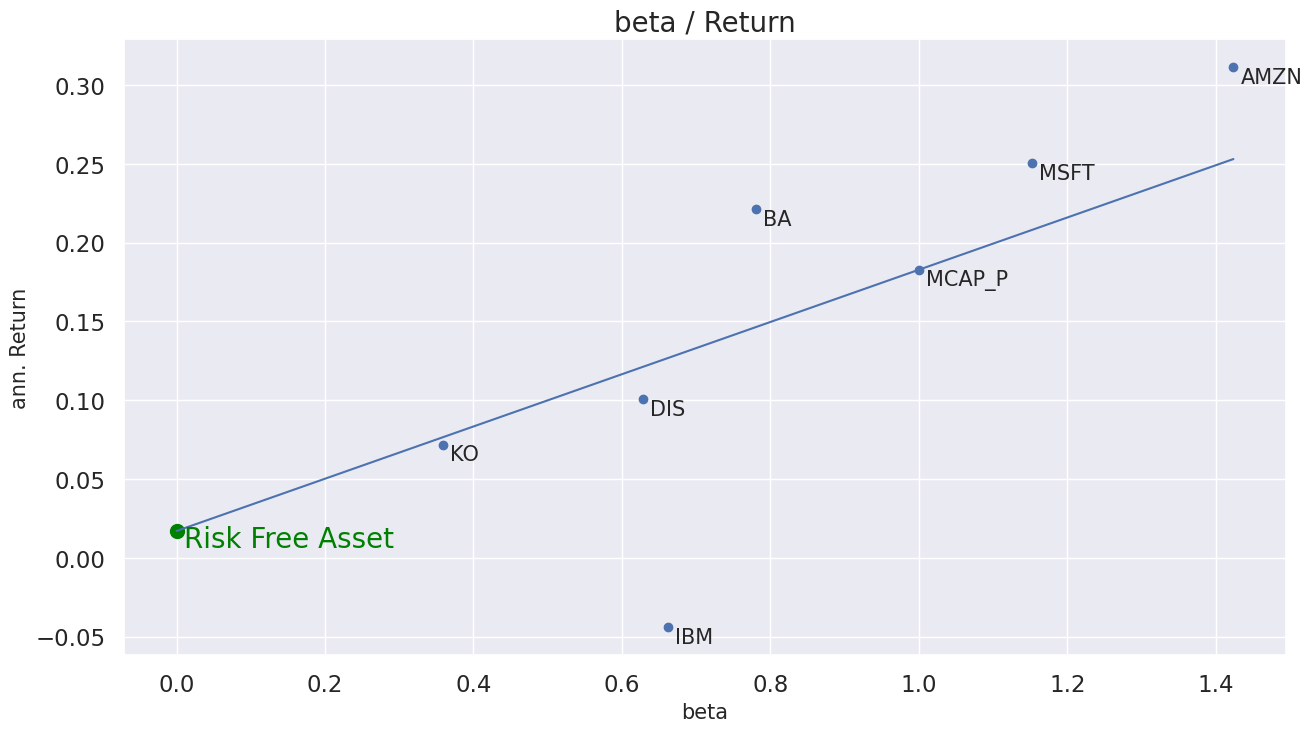

In [137]:
plt.figure(figsize = (15, 8))
plt.scatter(summary.beta, summary.Return)
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "beta"]+0.01, summary.loc[i, "Return"]-0.01), size = 15)
plt.plot([rf[1], summary.loc["AMZN", "beta"]], [rf[0],rf[0] + summary.loc["AMZN", "beta"]*(summary.loc["MCAP_P", "Return"] - rf[0])])
plt.scatter(rf[1], rf[0], s = 100, marker = "o", c = "green")
plt.annotate("Risk Free Asset", xy = (rf[1] + 0.01, rf[0] - 0.01), size = 20, color = "green")
plt.xlabel("beta", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("beta / Return", fontsize = 20)
plt.show()

## Another Intuition on Beta: Cyclical vs. non-Cyclical Stocks

In [138]:
ret.head()

,AMZN,BA,DIS,IBM,KO,MSFT,MCAP_P
Date,,,,,,,
2014-01-03,-0.00,0.01,-0.00,0.01,-0.00,-0.01,-0.00
2014-01-06,-0.01,0.01,-0.00,-0.00,-0.00,-0.02,-0.01
2014-01-07,0.01,0.02,0.01,0.02,0.00,0.01,0.01
2014-01-08,0.01,0.00,-0.01,-0.01,-0.01,-0.02,-0.01
2014-01-09,-0.00,0.01,-0.00,-0.00,-0.01,-0.01,-0.00


In [139]:
summary

,Return,Risk,SystRisk_var,beta
AMZN,0.31,0.31,0.04,1.42
BA,0.22,0.23,0.02,0.78
DIS,0.10,0.19,0.02,0.63
IBM,-0.04,0.20,0.02,0.66
KO,0.07,0.14,0.01,0.36
MSFT,0.25,0.23,0.04,1.15
MCAP_P,0.18,0.17,0.03,1.00


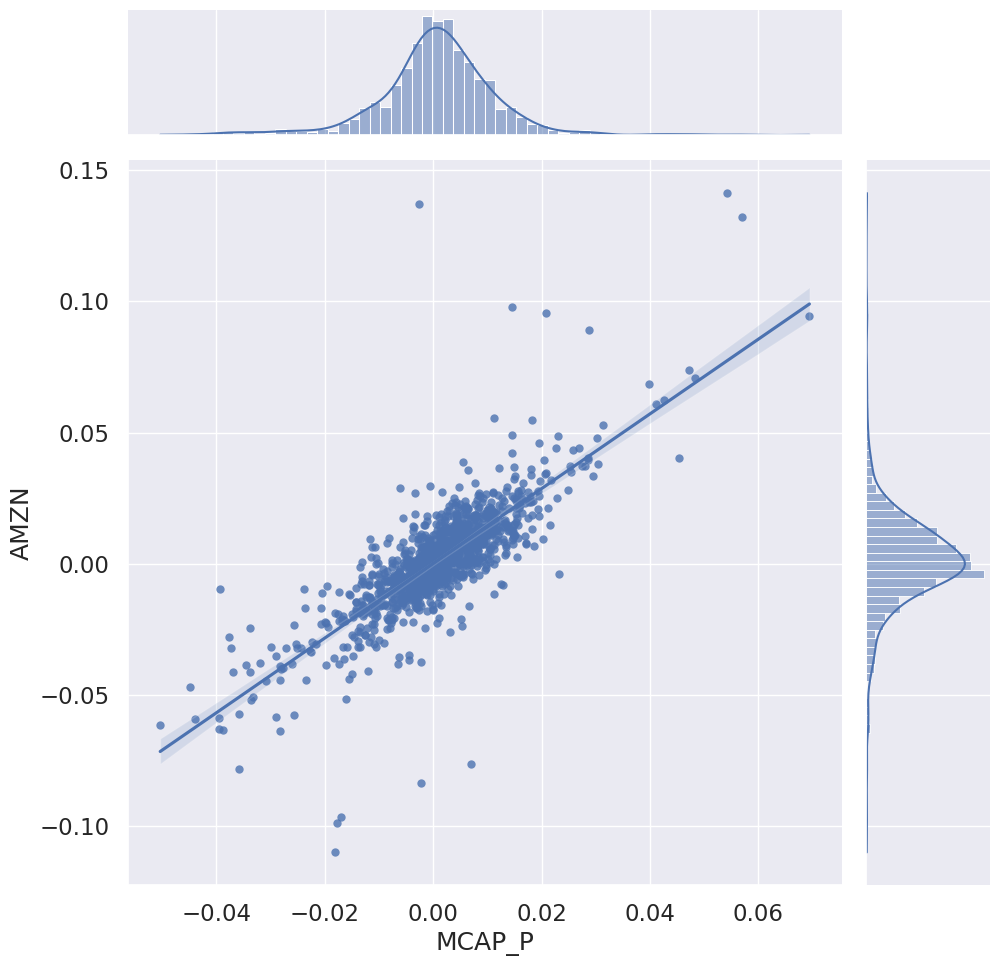

In [140]:
sns.set(font_scale=1.5)
sns.jointplot(data = ret, x = "MCAP_P", y = "AMZN", height = 10, kind = "reg")
plt.show()

In [141]:
np.polyfit(ret.MCAP_P, ret.AMZN, 1)

array([1.42372452e+00, 2.02218160e-04])

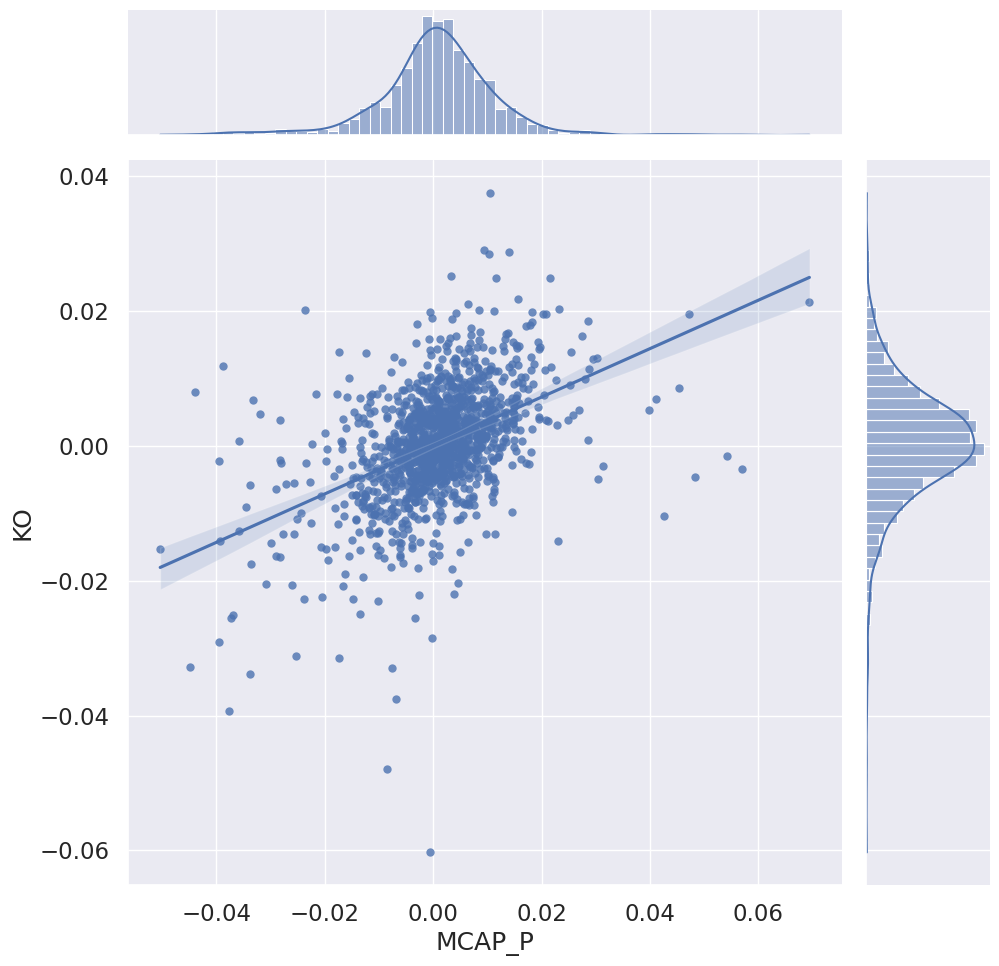

In [142]:
sns.set(font_scale=1.5)
sns.jointplot(data = ret, x = "MCAP_P", y = "KO", height = 10, kind = "reg")
plt.show()

In [143]:
stocks = yf.download(["AMZN", "KO"], "2007-12-31", "2018-12-31").Close

[*********************100%%**********************]  2 of 2 completed


In [144]:
stocks

Ticker,AMZN,KO
Date,,
2007-12-31,4.63,30.68
2008-01-02,4.81,30.55
2008-01-03,4.76,30.86
2008-01-04,4.44,30.92
2008-01-07,4.44,31.66
...,...,...
2018-12-21,68.87,47.57
2018-12-24,67.20,45.96
2018-12-26,73.54,46.94


/tmp/ipykernel_432137/608451463.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  stocks.resample("M").last().pct_change().rolling(12).mean().dropna().plot(figsize = (15, 12), subplots = True, sharey = True)


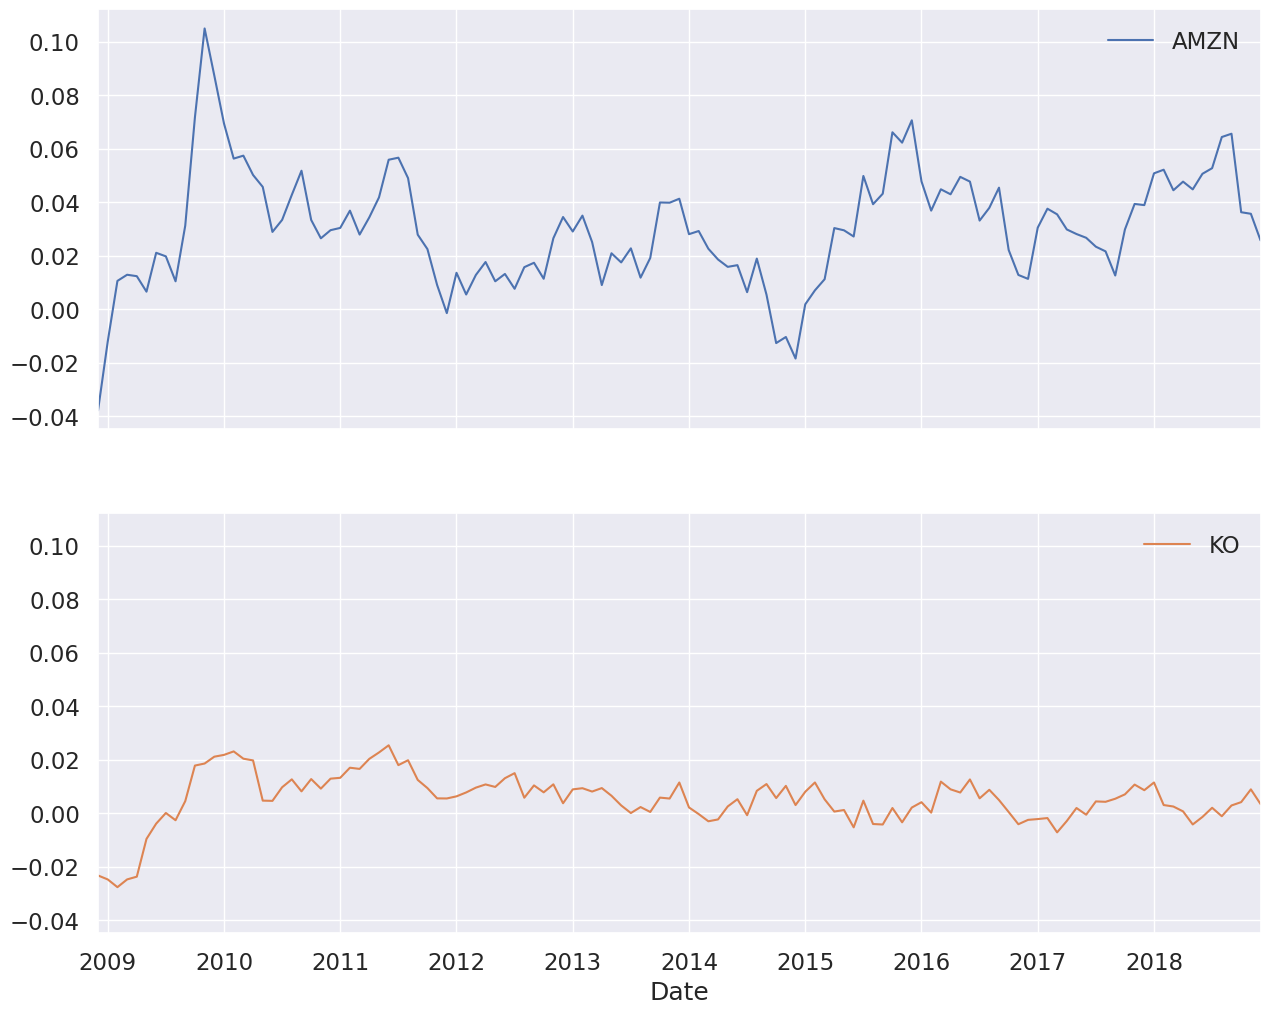

In [145]:
stocks.resample("M").last().pct_change().rolling(12).mean().dropna().plot(figsize = (15, 12), subplots = True, sharey = True)
plt.show()

In [146]:
pd.options.display.float_format = '{:.4f}'.format

## Forward-looking Portfolios - 2-Asset Case (Mean-Variance Optimization)

In [147]:
ret.head()

,AMZN,BA,DIS,IBM,KO,MSFT,MCAP_P
Date,,,,,,,
2014-01-03,-0.0038,0.0070,-0.0021,0.0060,-0.0049,-0.0067,-0.0022
2014-01-06,-0.0071,0.0057,-0.0038,-0.0034,-0.0047,-0.0211,-0.0086
2014-01-07,0.0112,0.0152,0.0069,0.0199,0.0030,0.0077,0.0100
2014-01-08,0.0098,0.0022,-0.0147,-0.0092,-0.0111,-0.0179,-0.0081
2014-01-09,-0.0023,0.0093,-0.0043,-0.0031,-0.0053,-0.0064,-0.0034


In [148]:
two_assets = ret.iloc[:, :2]
two_assets.head()

,AMZN,BA
Date,,
2014-01-03,-0.0038,0.0070
2014-01-06,-0.0071,0.0057
2014-01-07,0.0112,0.0152
2014-01-08,0.0098,0.0022
2014-01-09,-0.0023,0.0093


In [149]:
summ_two = ann_risk_return(two_assets)
summ_two

,Return,Risk
AMZN,0.3111,0.3100
BA,0.2214,0.2330


In [150]:
w_AMZN = 0.6
w_BA = 0.4
ws = np.array([w_AMZN, w_BA])
ws

array([0.6, 0.4])

### Calculating Expected Portfolio Return

In [151]:
ERet_AMZN = 0.20
ERet_BA = 0.15
ERets = pd.Series({"AMZN": ERet_AMZN, "BA": ERet_BA})
ERets

AMZN   0.2000
BA     0.1500
dtype: float64

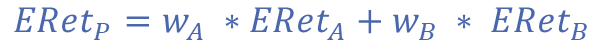

In [152]:
ERet_P = w_AMZN * ERet_AMZN + w_BA * ERet_BA
ERet_P

0.18

In [153]:
ERets.dot(ws)

np.float64(0.18)

### Calculating Expected Portfolio Risk

In [154]:
cov_matrix = two_assets.cov() * 252
cov_matrix

,AMZN,BA
AMZN,0.0961,0.0261
BA,0.0261,0.0543


In [155]:
VAR_AMZN = cov_matrix.iloc[0,0]
VAR_AMZN

np.float64(0.09608881377492147)

In [156]:
VAR_BA = cov_matrix.iloc[1,1]
VAR_BA

np.float64(0.054302683245588575)

In [157]:
cov_AMZN_BA = cov_matrix.iloc[1,0]
cov_AMZN_BA

np.float64(0.026126681371370586)

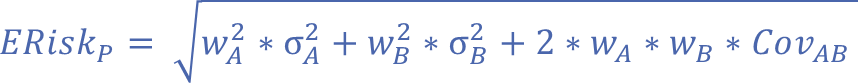

In [158]:
ERisk_P = np.sqrt(w_AMZN**2 * VAR_AMZN + w_BA**2 * VAR_BA + 2 * w_AMZN * w_BA * cov_AMZN_BA)
ERisk_P

np.float64(0.23626512509577832)

In [159]:
np.sqrt(cov_matrix.dot(ws).dot(ws))

np.float64(0.23626512509577832)

### Many Random Portfolios

In [160]:
np.random.seed(123)
matrix = np.random.random(10000 * 2).reshape(10000, 2)

In [161]:
weights = matrix / matrix.sum(axis = 1, keepdims= True)

In [162]:
weights

array([[0.7087962 , 0.2912038 ],
       [0.29152056, 0.70847944],
       [0.62969057, 0.37030943],
       ...,
       [0.52028043, 0.47971957],
       [0.22215611, 0.77784389],
       [0.49742945, 0.50257055]])

In [163]:
Return = ERets.dot(weights.T)
Return

array([0.18543981, 0.16457603, 0.18148453, ..., 0.17601402, 0.16110781,
       0.17487147])

In [164]:
Risk = np.sqrt((cov_matrix.dot(weights.T).T * weights).sum(axis = 1))
Risk

0      0.2523
1      0.2150
2      0.2403
3      0.2348
4      0.2303
        ...  
9995   0.2643
9996   0.2189
9997   0.2270
9998   0.2159
9999   0.2248
Length: 10000, dtype: float64

In [165]:
summ = pd.DataFrame({"Return" : Return, "Risk" : Risk})
summ

,Return,Risk
0,0.1854,0.2523
1,0.1646,0.2150
2,0.1815,0.2403
3,0.1794,0.2348
4,0.1775,0.2303
...,...,...
9995,0.1889,0.2643
9996,0.1710,0.2189
9997,0.1760,0.2270
9998,0.1611,0.2159


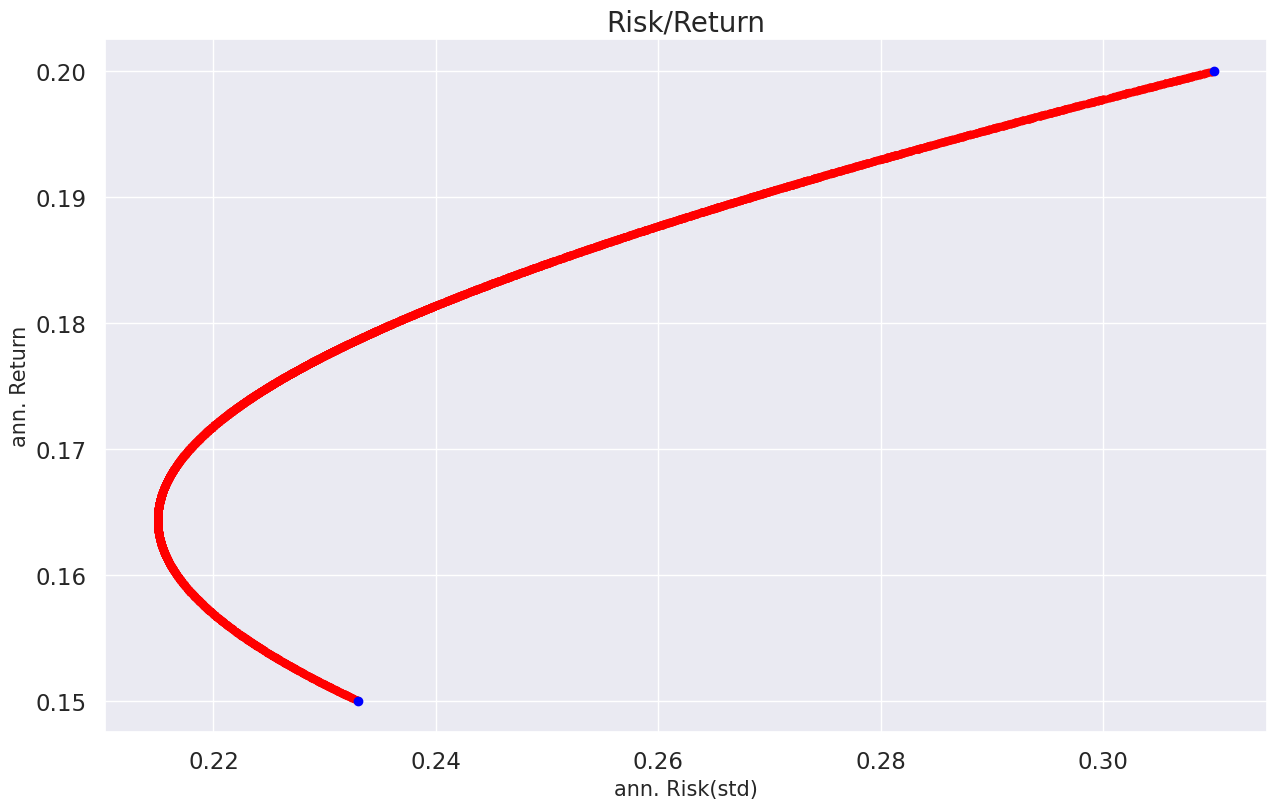

In [166]:
plt.figure(figsize = (15, 9))
plt.scatter(summ.Risk, summ.Return,s= 20, color = "red")
plt.scatter(summ_two.Risk, ERets, color = "blue")
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Risk/Return", fontsize = 20)
plt.show()

## Forward-looking Portfolios - not that simple

In [167]:
ret.head()

,AMZN,BA,DIS,IBM,KO,MSFT,MCAP_P
Date,,,,,,,
2014-01-03,-0.0038,0.0070,-0.0021,0.0060,-0.0049,-0.0067,-0.0022
2014-01-06,-0.0071,0.0057,-0.0038,-0.0034,-0.0047,-0.0211,-0.0086
2014-01-07,0.0112,0.0152,0.0069,0.0199,0.0030,0.0077,0.0100
2014-01-08,0.0098,0.0022,-0.0147,-0.0092,-0.0111,-0.0179,-0.0081
2014-01-09,-0.0023,0.0093,-0.0043,-0.0031,-0.0053,-0.0064,-0.0034


In [168]:
COV

,AMZN,BA,DIS,IBM,KO,MSFT,MCAP_P
AMZN,0.0961,0.0261,0.0200,0.0185,0.0090,0.0383,0.0432
BA,0.0261,0.0543,0.0184,0.0190,0.0100,0.0222,0.0237
DIS,0.0200,0.0184,0.0356,0.0147,0.0084,0.0177,0.0191
IBM,0.0185,0.0190,0.0147,0.0397,0.0092,0.0215,0.0201
KO,0.0090,0.0100,0.0084,0.0092,0.0187,0.0108,0.0109
MSFT,0.0383,0.0222,0.0177,0.0215,0.0108,0.0537,0.0350
MCAP_P,0.0432,0.0237,0.0191,0.0201,0.0109,0.0350,0.0304


In [169]:
COV_C = COV.iloc[:-1, :-1]
COV_C

,AMZN,BA,DIS,IBM,KO,MSFT
AMZN,0.0961,0.0261,0.0200,0.0185,0.0090,0.0383
BA,0.0261,0.0543,0.0184,0.0190,0.0100,0.0222
DIS,0.0200,0.0184,0.0356,0.0147,0.0084,0.0177
IBM,0.0185,0.0190,0.0147,0.0397,0.0092,0.0215
KO,0.0090,0.0100,0.0084,0.0092,0.0187,0.0108
MSFT,0.0383,0.0222,0.0177,0.0215,0.0108,0.0537


In [170]:
summary

,Return,Risk,SystRisk_var,beta
AMZN,0.3111,0.3100,0.0432,1.4237
BA,0.2214,0.2330,0.0237,0.7800
DIS,0.1006,0.1888,0.0191,0.6283
IBM,-0.0442,0.1993,0.0201,0.6618
KO,0.0717,0.1368,0.0109,0.3589
MSFT,0.2504,0.2317,0.0350,1.1524
MCAP_P,0.1827,0.1743,0.0304,1.0000


In [171]:
summary_C = summary.iloc[:-1, :].copy()

In [172]:
summary_C

,Return,Risk,SystRisk_var,beta
AMZN,0.3111,0.3100,0.0432,1.4237
BA,0.2214,0.2330,0.0237,0.7800
DIS,0.1006,0.1888,0.0191,0.6283
IBM,-0.0442,0.1993,0.0201,0.6618
KO,0.0717,0.1368,0.0109,0.3589
MSFT,0.2504,0.2317,0.0350,1.1524


In [173]:
summary_C["ER1"] = [0.25, 0.15, 0.08, 0.08, 0.10, 0.15] 

In [174]:
summary_C

,Return,Risk,SystRisk_var,beta,ER1
AMZN,0.3111,0.3100,0.0432,1.4237,0.2500
BA,0.2214,0.2330,0.0237,0.7800,0.1500
DIS,0.1006,0.1888,0.0191,0.6283,0.0800
IBM,-0.0442,0.1993,0.0201,0.6618,0.0800
KO,0.0717,0.1368,0.0109,0.3589,0.1000
MSFT,0.2504,0.2317,0.0350,1.1524,0.1500


In [175]:
noa = len(summary_C.index)
noa

6

In [176]:
nop = 1000000
nop

1000000

In [177]:
np.random.seed(123)
matrix = np.random.random(noa * nop).reshape(nop, noa)

In [178]:
matrix

array([[0.69646919, 0.28613933, 0.22685145, 0.55131477, 0.71946897,
        0.42310646],
       [0.9807642 , 0.68482974, 0.4809319 , 0.39211752, 0.34317802,
        0.72904971],
       [0.43857224, 0.0596779 , 0.39804426, 0.73799541, 0.18249173,
        0.17545176],
       ...,
       [0.62483862, 0.59134382, 0.36809244, 0.68256896, 0.95087943,
        0.8901324 ],
       [0.77031552, 0.77814261, 0.14151563, 0.32447434, 0.62107081,
        0.66743122],
       [0.02079644, 0.80470884, 0.02576405, 0.20198792, 0.83794608,
        0.63565318]])

In [179]:
weights = matrix / matrix.sum(axis = 1, keepdims= True)

In [180]:
weights

array([[0.23988467, 0.09855488, 0.07813438, 0.18988917, 0.24780647,
        0.14573043],
       [0.27161429, 0.18965776, 0.13319   , 0.10859361, 0.09504023,
        0.20190411],
       [0.22014101, 0.02995528, 0.19979801, 0.37043624, 0.09160159,
        0.08806788],
       ...,
       [0.15210822, 0.14395438, 0.08960696, 0.16616186, 0.2314783 ,
        0.21669028],
       [0.23322045, 0.23559018, 0.04284522, 0.09823773, 0.18803518,
        0.20207124],
       [0.00823016, 0.31846242, 0.01019609, 0.07993644, 0.33161601,
        0.25155887]])

In [181]:
Return = summary_C.ER1.dot(weights.T)
Return

array([0.14283649, 0.15548457, 0.12751762, ..., 0.13573309, 0.15404448,
       0.12793294])

In [182]:
Risk = np.sqrt((COV_C.dot(weights.T).T * weights).sum(axis = 1))
Risk

0        0.1534
1        0.1712
2        0.1588
3        0.1466
4        0.1724
          ...  
999995   0.1531
999996   0.1665
999997   0.1493
999998   0.1640
999999   0.1472
Length: 1000000, dtype: float64

In [183]:
Risk.shape

(1000000,)

In [184]:
Return.shape

(1000000,)

In [185]:
rf = 0.02

In [186]:
Sharpe = (Return - rf) / Risk

In [187]:
summ = pd.DataFrame({"Return" : Return, "Risk" : Risk, "Sharpe" : Sharpe})
summ

,Return,Risk,Sharpe
0,0.1428,0.1534,0.8009
1,0.1555,0.1712,0.7915
2,0.1275,0.1588,0.6769
3,0.1276,0.1466,0.7338
4,0.1563,0.1724,0.7910
...,...,...,...
999995,0.1205,0.1531,0.6562
999996,0.1440,0.1665,0.7447
999997,0.1357,0.1493,0.7754
999998,0.1540,0.1640,0.8175


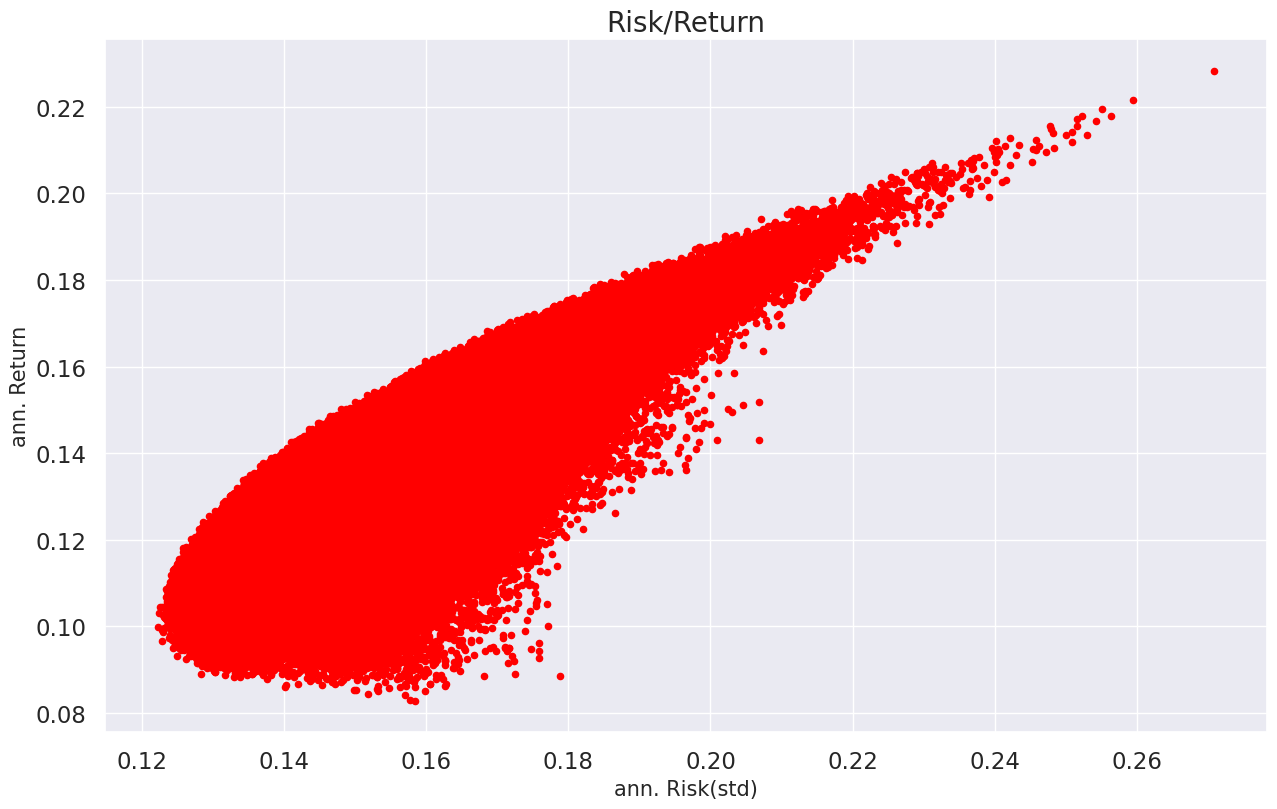

In [188]:
plt.figure(figsize = (15, 9))
plt.scatter(summ.Risk, summ.Return,s= 20, color = "red")
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Risk/Return", fontsize = 20)
plt.show()

In [189]:
summ.describe()

,Return,Risk,Sharpe
count,1000000.0000,1000000.0000,1000000.0000
mean,0.1350,0.1566,0.7331
std,0.0151,0.0126,0.0594
min,0.0828,0.1222,0.3828
25%,0.1243,0.1476,0.6966
50%,0.1350,0.1554,0.7412
75%,0.1451,0.1641,0.7760
max,0.2283,0.2709,0.8833


In [190]:
summ.Sharpe.idxmax()

873915

In [191]:
summ.iloc[summ.Sharpe.idxmax(), :]

Return   0.1613
Risk     0.1599
Sharpe   0.8833
Name: 873915, dtype: float64

In [192]:
weights[summ.Sharpe.idxmax()]

array([3.45964754e-01, 1.77094106e-01, 8.56191979e-05, 8.51874520e-03,
       4.54615917e-01, 1.37208588e-02])

In [193]:
PF1 = pd.Series(index = summary_C.index, data = weights[summ.Sharpe.idxmax()])
PF1

AMZN   0.3460
BA     0.1771
DIS    0.0001
IBM    0.0085
KO     0.4546
MSFT   0.0137
dtype: float64

### Changing Expected Returns

In [194]:
summary_C

,Return,Risk,SystRisk_var,beta,ER1
AMZN,0.3111,0.3100,0.0432,1.4237,0.2500
BA,0.2214,0.2330,0.0237,0.7800,0.1500
DIS,0.1006,0.1888,0.0191,0.6283,0.0800
IBM,-0.0442,0.1993,0.0201,0.6618,0.0800
KO,0.0717,0.1368,0.0109,0.3589,0.1000
MSFT,0.2504,0.2317,0.0350,1.1524,0.1500


In [195]:
summary_C["ER2"] = [0.22, 0.18, 0.11, 0.11, 0.07, 0.12]
summary_C

,Return,Risk,SystRisk_var,beta,ER1,ER2
AMZN,0.3111,0.3100,0.0432,1.4237,0.2500,0.2200
BA,0.2214,0.2330,0.0237,0.7800,0.1500,0.1800
DIS,0.1006,0.1888,0.0191,0.6283,0.0800,0.1100
IBM,-0.0442,0.1993,0.0201,0.6618,0.0800,0.1100
KO,0.0717,0.1368,0.0109,0.3589,0.1000,0.0700
MSFT,0.2504,0.2317,0.0350,1.1524,0.1500,0.1200


In [196]:
Return = summary_C.ER2.dot(weights.T)
Return

array([0.1348312 , 0.15137105, 0.133529  , ..., 0.12971648, 0.14664487,
       0.12244864])

In [197]:
Risk = np.sqrt((COV_C.dot(weights.T).T * weights).sum(axis = 1))

In [198]:
Sharpe = (Return - rf) / Risk

In [199]:
summ2 = pd.DataFrame({"Return" : Return, "Risk" : Risk, "Sharpe" : Sharpe})
summ2

,Return,Risk,Sharpe
0,0.1348,0.1534,0.7487
1,0.1514,0.1712,0.7675
2,0.1335,0.1588,0.7147
3,0.1288,0.1466,0.7416
4,0.1477,0.1724,0.7411
...,...,...,...
999995,0.1226,0.1531,0.6700
999996,0.1533,0.1665,0.8003
999997,0.1297,0.1493,0.7351
999998,0.1466,0.1640,0.7724


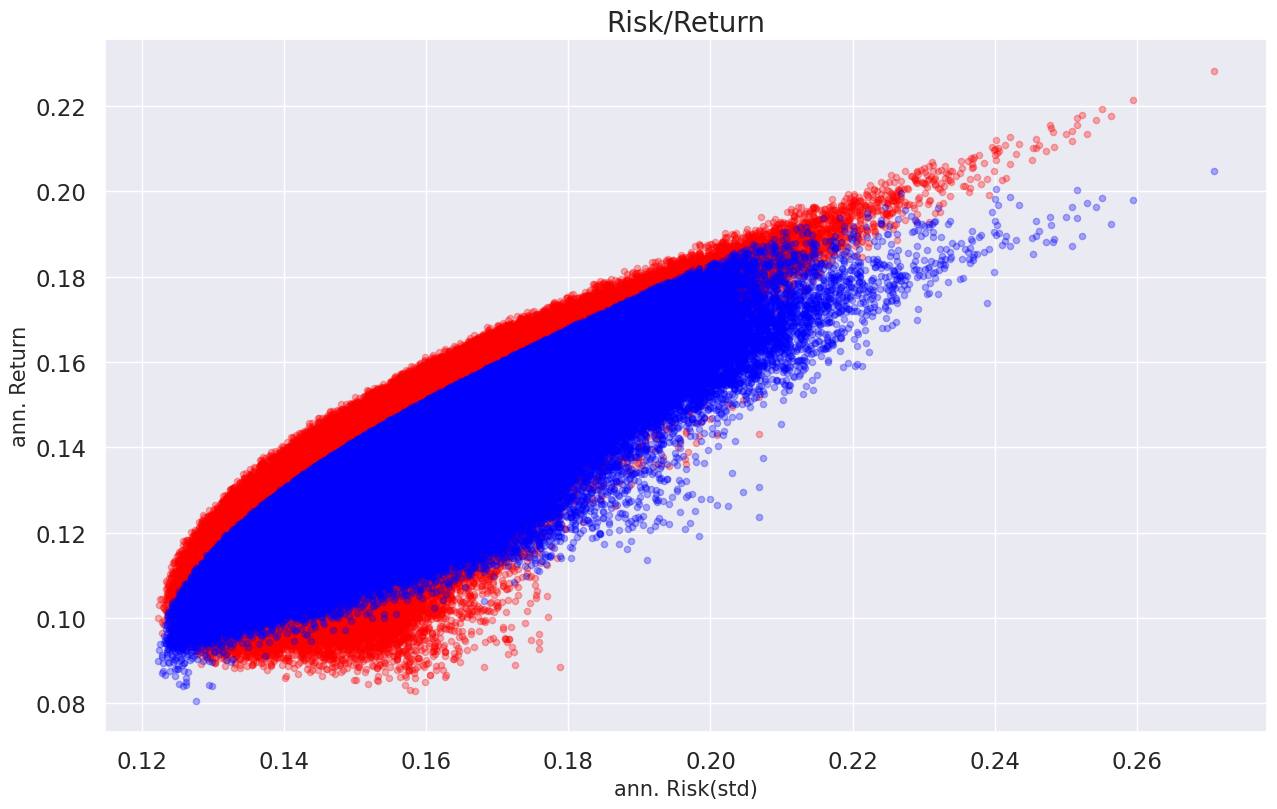

In [200]:
plt.figure(figsize = (15, 9))
plt.scatter(summ.Risk, summ.Return,s= 20, color = "red", alpha = 0.3)
plt.scatter(summ2.Risk, summ2.Return,s= 20, color = "blue", alpha = 0.3)
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Risk/Return", fontsize = 20)
plt.show()

In [201]:
summ2.describe()

,Return,Risk,Sharpe
count,1000000.0000,1000000.0000,1000000.0000
mean,0.1350,0.1566,0.7336
std,0.0127,0.0126,0.0433
min,0.0806,0.1222,0.4743
25%,0.1264,0.1476,0.7079
50%,0.1350,0.1554,0.7385
75%,0.1434,0.1641,0.7654
max,0.2048,0.2709,0.8234


In [202]:
summ2.Sharpe.idxmax()

812452

In [203]:
summ2.iloc[summ2.Sharpe.idxmax(), :]

Return   0.1683
Risk     0.1801
Sharpe   0.8234
Name: 812452, dtype: float64

In [204]:
summ.iloc[summ.Sharpe.idxmax(), :]

Return   0.1613
Risk     0.1599
Sharpe   0.8833
Name: 873915, dtype: float64

In [205]:
weights[summ2.Sharpe.idxmax()]

array([0.29233733, 0.42676296, 0.10988534, 0.07280503, 0.09442998,
       0.00377936])

In [206]:
PF2 = pd.Series(index = summary_C.index, data = weights[summ2.Sharpe.idxmax()])
PF2

AMZN   0.2923
BA     0.4268
DIS    0.1099
IBM    0.0728
KO     0.0944
MSFT   0.0038
dtype: float64

In [207]:
PF1

AMZN   0.3460
BA     0.1771
DIS    0.0001
IBM    0.0085
KO     0.4546
MSFT   0.0137
dtype: float64